In [393]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#importing numpy and panda
import numpy as np
import pandas as pd

#librariers to build models and checking accuracy
import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols

#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#Library for saving data
import pickle

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#library for error detection in regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings
warnings.filterwarnings('ignore')

In [282]:
df_train=pd.read_csv("housetrain.csv")

In [283]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [284]:
df_train.shape

(1168, 81)

In [285]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [286]:
(df_train.isnull().sum()[df_train.isnull().sum()>0])/len(df_train)*100

LotFrontage     18.321918
Alley           93.407534
MasVnrType       0.599315
MasVnrArea       0.599315
BsmtQual         2.568493
BsmtCond         2.568493
BsmtExposure     2.654110
BsmtFinType1     2.568493
BsmtFinType2     2.654110
FireplaceQu     47.174658
GarageType       5.479452
GarageYrBlt      5.479452
GarageFinish     5.479452
GarageQual       5.479452
GarageCond       5.479452
PoolQC          99.400685
Fence           79.708904
MiscFeature     96.232877
dtype: float64

##### We can now see that there are 4 features with more than 80% : "PoolQC","Fence","MiscFeature","Alley", which can be dropped straightaway

In [287]:
df_train.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace = True)

#### Categorical columns which have null values

In [288]:
df_train.select_dtypes(include='object').isnull().sum()[df_train.select_dtypes(include='object').isnull().sum()>0]

MasVnrType        7
BsmtQual         30
BsmtCond         30
BsmtExposure     31
BsmtFinType1     30
BsmtFinType2     31
FireplaceQu     551
GarageType       64
GarageFinish     64
GarageQual       64
GarageCond       64
dtype: int64

__Imputing them__

In [289]:
# Replace Null values with 'None'  
for col in ('MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    
    df_train[col]=df_train[col].fillna('None')

In [290]:
df_train.select_dtypes("object").describe()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1168   1168     1168        1168      1168      1168      1168   
unique        5      2        4           4         1         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq        928   1164      740        1046      1168       842      1105   

       Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
count          1168       1168       1168     1168       1168      1168   
unique           25          9          8        5          8         6   
top           NAmes       Norm       Norm     1Fam     1Story     Gable   
freq            182       1005       1154      981        578       915   

       RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
count      1168        1168        1168       1168      1168      1168   
unique        8          14          15          4         4         5   
top     CompShg     VinylSd     VinylSd       None        TA        TA   
freq       1144         396         387        703       717      1022   

       Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
count        1168     1168     1168         1168         1168         1168   
unique          6        5        5            5            7            7   
top        CBlock       TA       TA           No          Unf          Unf   
freq          516      517     1041          756          345         1002   

       Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
count     1168      1168       1168       1168        1168       1168   
unique       6         5          2          5           4          7   
top       GasA        Ex          Y      SBrkr          TA        Typ   
freq      1143       585       1090       1070         578       1085   

       FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count         1168       1168         1168       1168       1168       1168   
unique           6          7            4          6          6          3   
top           None     Attchd          Unf         TA         TA          Y   
freq           551        691          487       1050       1061       1071   

       SaleType SaleCondition  
count      1168          1168  
unique        9             6  
top          WD        Normal  
freq        999           945

We can see a lot of categorical columns contains only one unique value, which will not provide any useful information for the model, so we can drop these columns.

In [291]:
#Dropping the columns which have 85%+ values related to only one unique value.
cols=[]
for col in df_train.select_dtypes("object").columns:
    if df_train[col].value_counts().max()>= int(round(0.85*len(df_train),0)):
        cols.append(col)
cols

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType']

In [292]:
df_train.drop(cols,inplace=True,axis=1)

In [293]:
print(df_train.select_dtypes("object").columns)

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')


In [294]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   LotShape       1168 non-null   object 
 6   LotConfig      1168 non-null   object 
 7   Neighborhood   1168 non-null   object 
 8   BldgType       1168 non-null   object 
 9   HouseStyle     1168 non-null   object 
 10  OverallQual    1168 non-null   int64  
 11  OverallCond    1168 non-null   int64  
 12  YearBuilt      1168 non-null   int64  
 13  YearRemodAdd   1168 non-null   int64  
 14  RoofStyle      1168 non-null   object 
 15  Exterior1st    1168 non-null   object 
 16  Exterior2nd    1168 non-null   object 
 17  MasVnrType     1168 non-null   object 
 18  MasVnrAr

#### Imputing numeric features with mean values

In [295]:
df_train.select_dtypes(exclude='object').isnull().sum()[df_train.select_dtypes(exclude='object').isnull().sum()>0]

LotFrontage    214
MasVnrArea       7
GarageYrBlt     64
dtype: int64

In [296]:
 round(df_train['GarageYrBlt'].mean(),0)

1978.0

In [297]:
df_train['LotFrontage'] = df_train['LotFrontage'].replace(np.nan, round(df_train['LotFrontage'].mean(),0))
df_train['MasVnrArea'] = df_train['MasVnrArea'].replace(np.nan,  round(df_train['MasVnrArea'].mean(),0))
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].replace(np.nan, round(df_train['GarageYrBlt'].mean(),0))

In [298]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch 

In [299]:
#Dropping the numeric columns which have 85%+ values related to only one unique value.
ncols=[]
for col in df_train.select_dtypes(exclude="object").columns:
    if df_train[col].value_counts().max()>= int(round(0.85*len(df_train),0)):
        ncols.append(col)
ncols

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [300]:
#to double check if the columns above have only one unique value in majority 
for i in ncols:
    print(df_train[i].value_counts(),"\n")

0       1032
180        5
93         2
468        2
294        2
        ... 
239        1
232        1
230        1
228        1
1474       1
Name: BsmtFinSF2, Length: 122, dtype: int64 

0      1145
80        3
360       2
392       1
528       1
515       1
514       1
513       1
481       1
473       1
420       1
384       1
390       1
53        1
371       1
234       1
232       1
156       1
144       1
120       1
572       1
Name: LowQualFinSF, dtype: int64 

0    1105
1      61
2       2
Name: BsmtHalfBath, dtype: int64 

1    1114
2      52
0       1
3       1
Name: KitchenAbvGr, dtype: int64 

0      999
112     13
96       6
192      5
216      5
      ... 
129      1
123      1
114      1
105      1
552      1
Name: EnclosedPorch, Length: 106, dtype: int64 

0      1146
168       3
144       2
216       2
180       2
140       1
153       1
162       1
130       1
23        1
182       1
196       1
96        1
238       1
245       1
290       1
304       1
508       

In [301]:
df_train.drop(ncols,inplace=True,axis=1)

In [302]:
df_train.shape

(1168, 50)

In [303]:
pd.options.display.max_columns = None
df_train.describe(include="all")

Id   MSSubClass MSZoning  LotFrontage        LotArea  \
count   1168.000000  1168.000000     1168  1168.000000    1168.000000   
unique          NaN          NaN        5          NaN            NaN   
top             NaN          NaN       RL          NaN            NaN   
freq            NaN          NaN      928          NaN            NaN   
mean     724.136130    56.767979      NaN    70.990582   10484.749144   
std      416.159877    41.940650      NaN    22.437057    8957.442311   
min        1.000000    20.000000      NaN    21.000000    1300.000000   
25%      360.500000    20.000000      NaN    60.000000    7621.500000   
50%      714.500000    50.000000      NaN    71.000000    9522.500000   
75%     1079.500000    70.000000      NaN    79.250000   11515.500000   
max     1460.000000   190.000000      NaN   313.000000  164660.000000   

       LotShape LotConfig Neighborhood BldgType HouseStyle  OverallQual  \
count      1168      1168         1168     1168       1168  1168.000000   
unique        4         5           25        5          8          NaN   
top         Reg    Inside        NAmes     1Fam     1Story          NaN   
freq        740       842          182      981        578          NaN   
mean        NaN       NaN          NaN      NaN        NaN     6.104452   
std         NaN       NaN          NaN      NaN        NaN     1.390153   
min         NaN       NaN          NaN      NaN        NaN     1.000000   
25%         NaN       NaN          NaN      NaN        NaN     5.000000   
50%         NaN       NaN          NaN      NaN        NaN     6.000000   
75%         NaN       NaN          NaN      NaN        NaN     7.000000   
max         NaN       NaN          NaN      NaN        NaN    10.000000   

        OverallCond    YearBuilt  YearRemodAdd RoofStyle Exterior1st  \
count   1168.000000  1168.000000   1168.000000      1168        1168   
unique          NaN          NaN           NaN         6          14   
top             NaN          NaN           NaN     Gable     VinylSd   
freq            NaN          NaN           NaN       915         396   
mean       5.595890  1970.930651   1984.758562       NaN         NaN   
std        1.124343    30.145255     20.785185       NaN         NaN   
min        1.000000  1875.000000   1950.000000       NaN         NaN   
25%        5.000000  1954.000000   1966.000000       NaN         NaN   
50%        5.000000  1972.000000   1993.000000       NaN         NaN   
75%        6.000000  2000.000000   2004.000000       NaN         NaN   
max        9.000000  2010.000000   2010.000000       NaN         NaN   

       Exterior2nd MasVnrType   MasVnrArea ExterQual Foundation BsmtQual  \
count         1168       1168  1168.000000      1168       1168     1168   
unique          15          4          NaN         4          6        5   
top        VinylSd       None          NaN        TA     CBlock       TA   
freq           387        703          NaN       717        516      517   
mean           NaN        NaN   102.308219       NaN        NaN      NaN   
std            NaN        NaN   182.047154       NaN        NaN      NaN   
min            NaN        NaN     0.000000       NaN        NaN      NaN   
25%            NaN        NaN     0.000000       NaN        NaN      NaN   
50%            NaN        NaN     0.000000       NaN        NaN      NaN   
75%            NaN        NaN   160.000000       NaN        NaN      NaN   
max            NaN        NaN  1600.000000       NaN        NaN      NaN   

       BsmtExposure BsmtFinType1   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF  \
count          1168         1168  1168.000000  1168.000000  1168.000000   
unique            5            7          NaN          NaN          NaN   
top              No          Unf          NaN          NaN          NaN   
freq            756          345          NaN          NaN          NaN   
mean            NaN          NaN   444.726027   569.721747  1061.095034   
std        

In [304]:
df_train[df_train.duplicated(keep=False)]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LotConfig, Neighborhood, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, Foundation, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, MoSold, YrSold, SaleCondition, SalePrice]
Index: []

No duplicates found

#### We have imputed numeric and Categorical features and have also cleaned the data. We can now proceed to EDA

## EDA:

In [305]:
cat_df=df_train.select_dtypes("object")

In [306]:
num_df= df_train.select_dtypes(exclude="object")

In [309]:
cat_df.shape,num_df.shape

((1168, 21), (1168, 29))

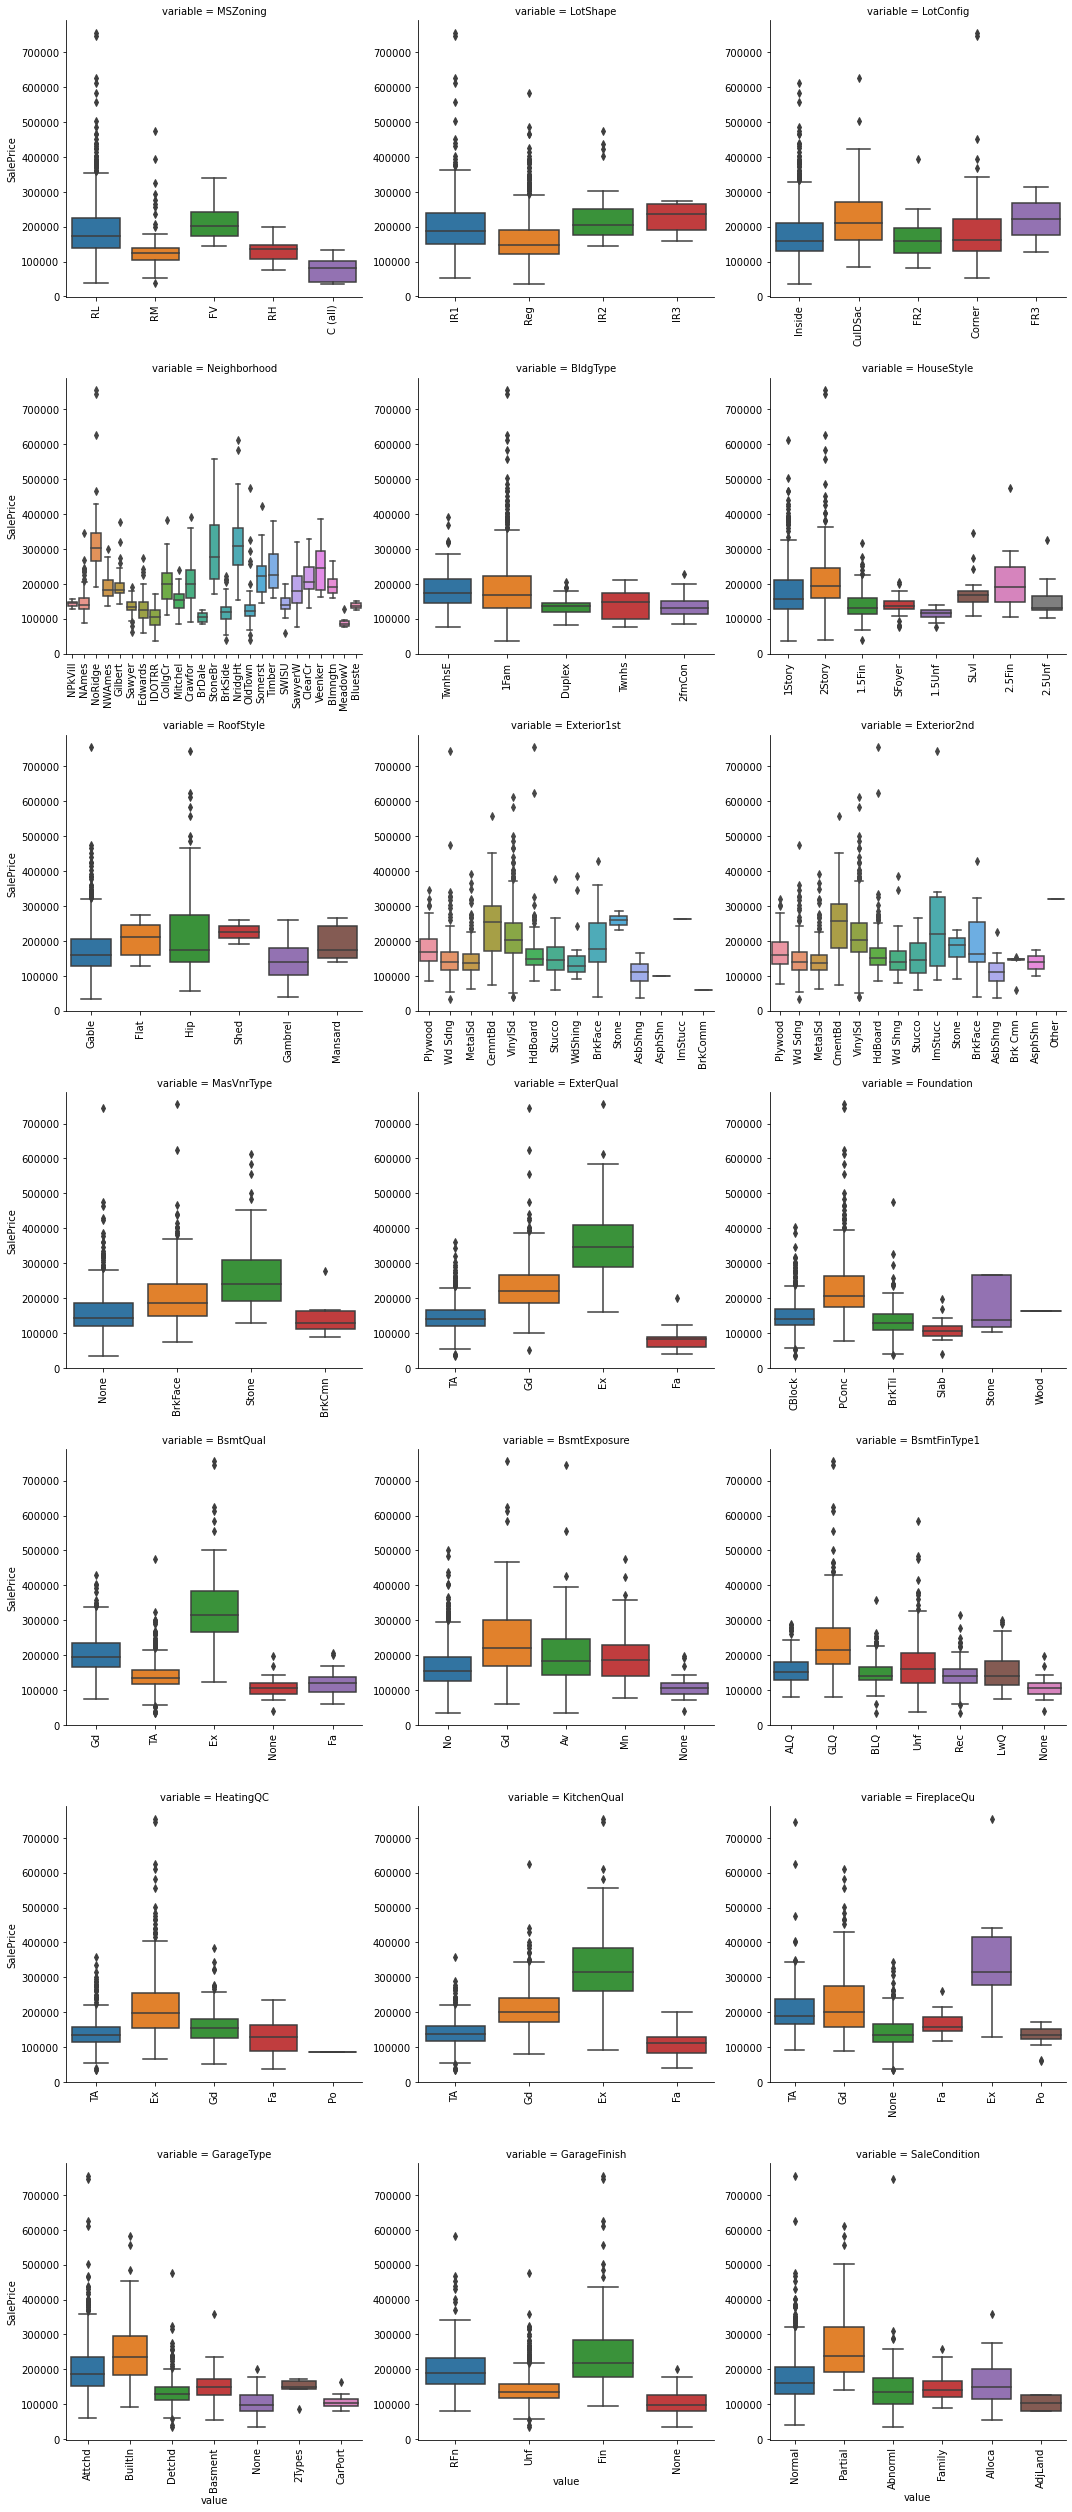

In [307]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=cat_df)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

Observations:
- a


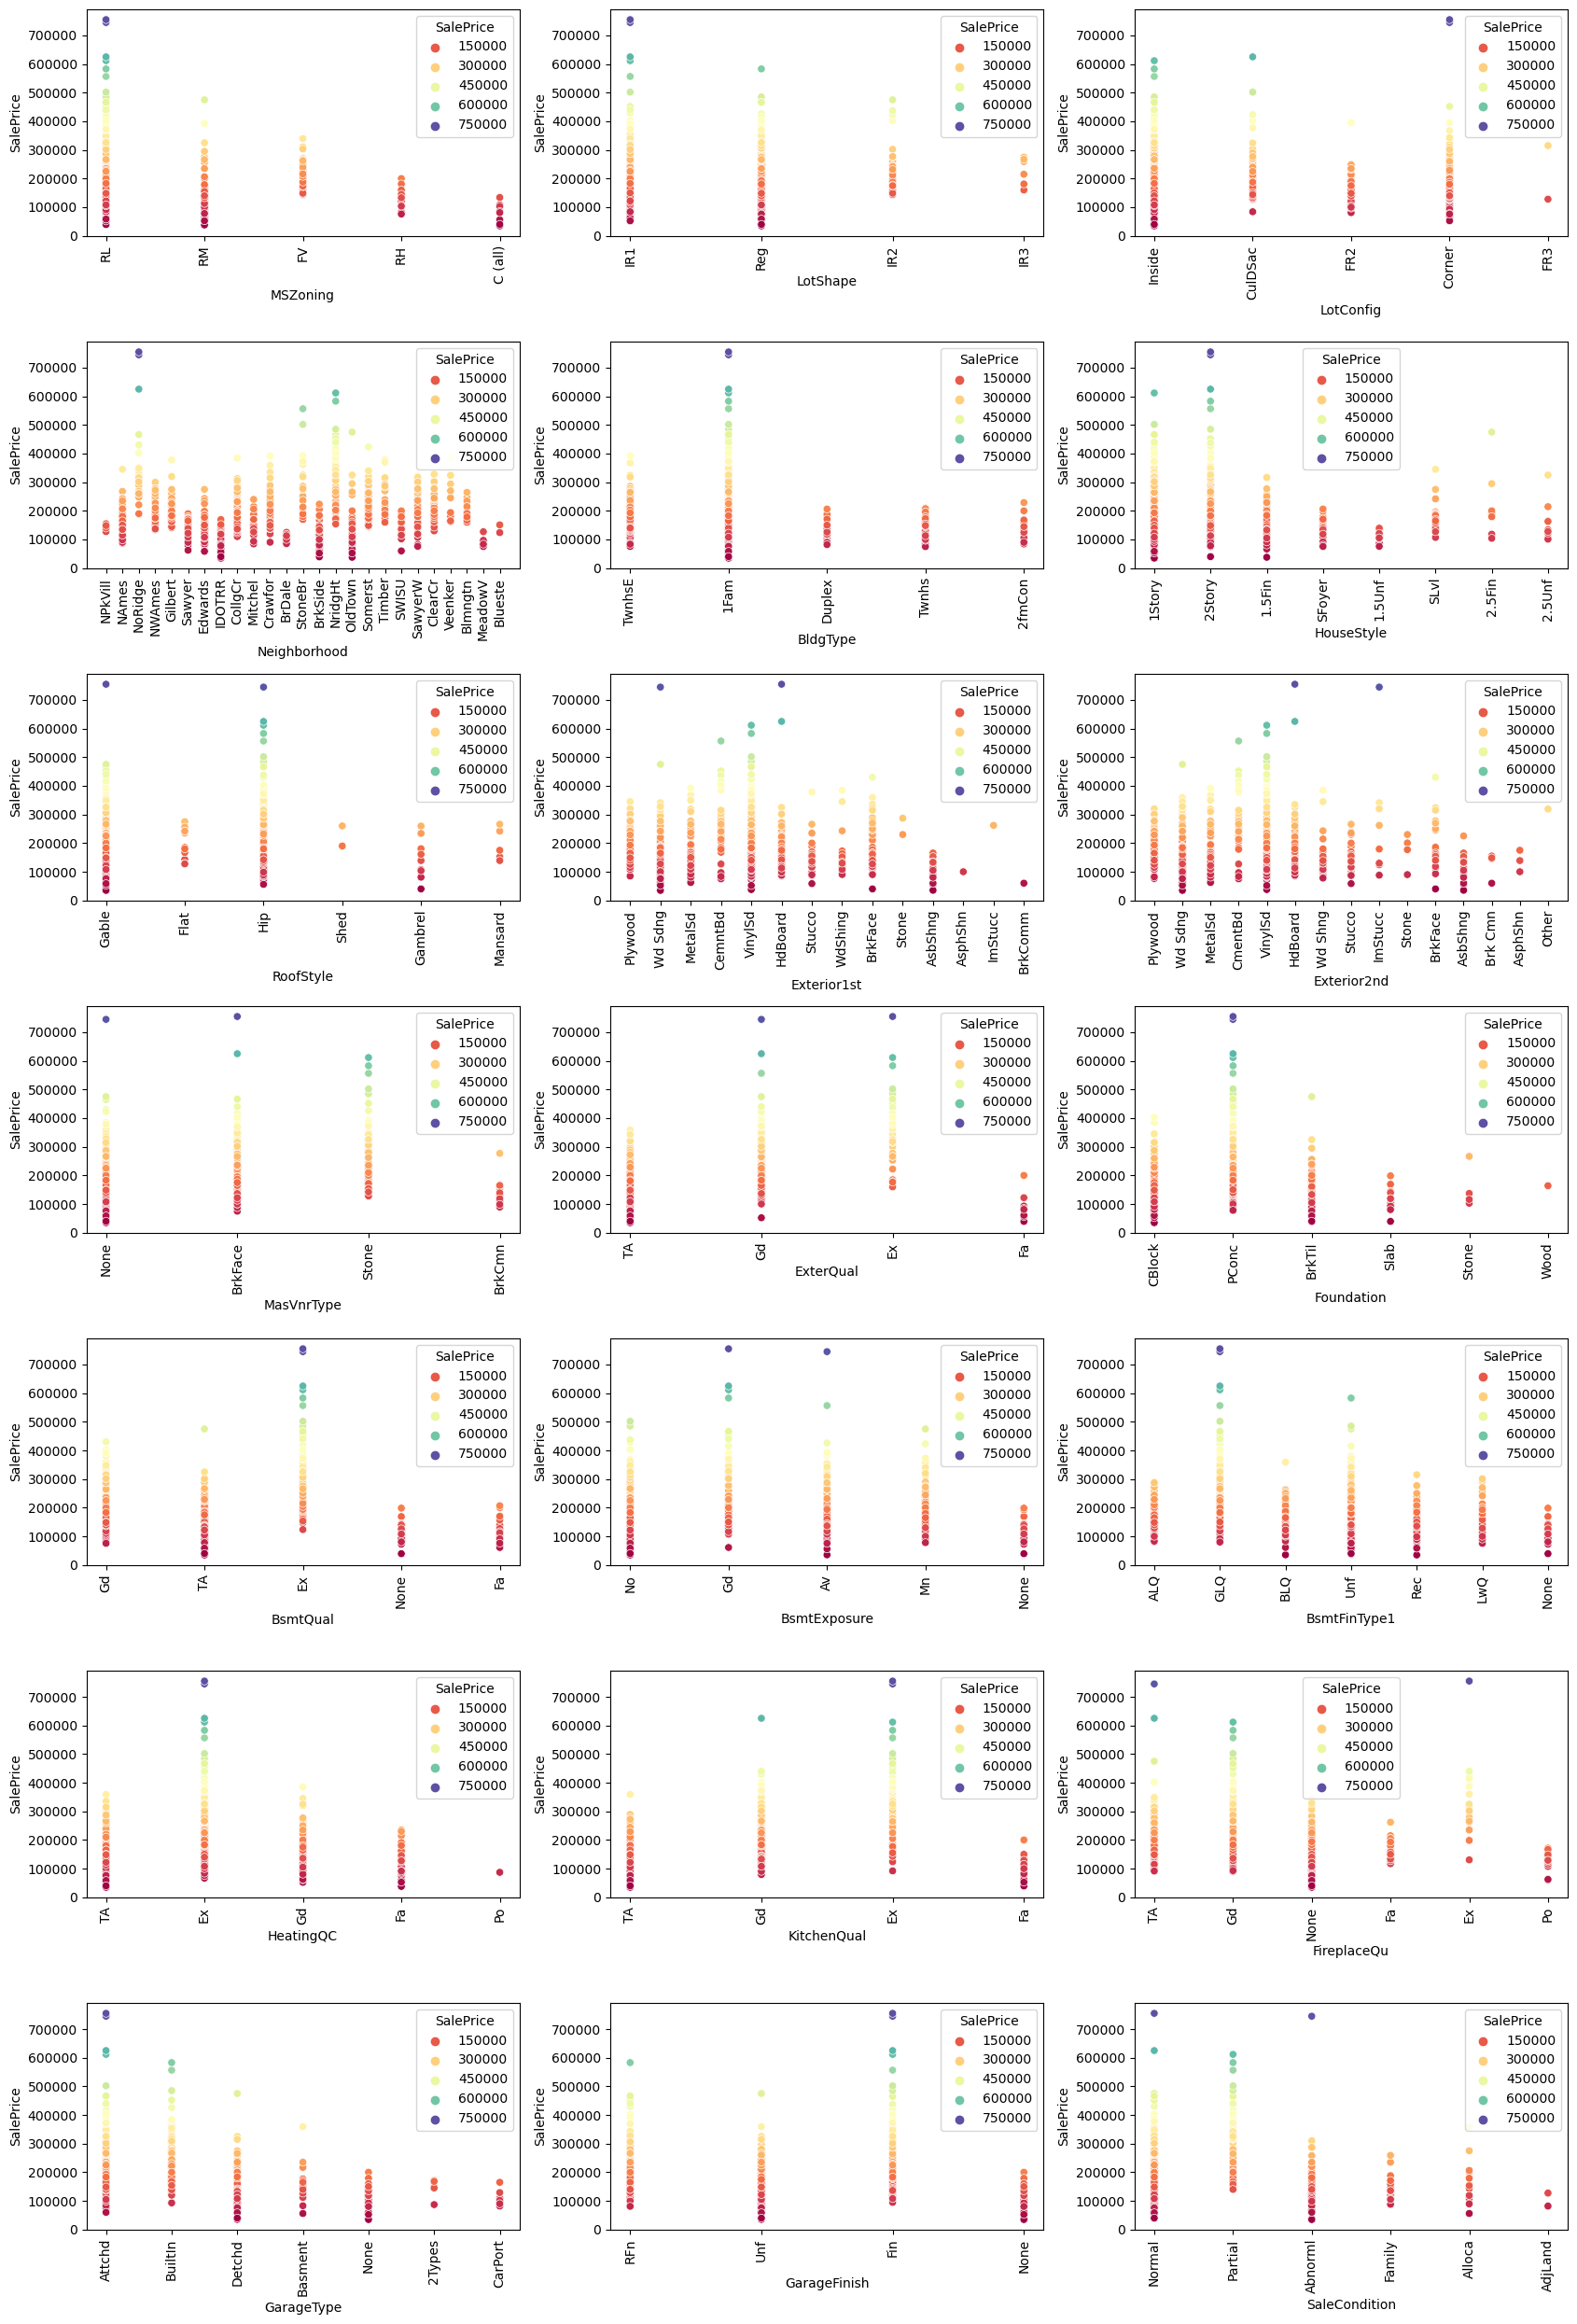

In [323]:
plt.figure(figsize=(17,25))
x=1
for i in cat_df.columns:
    if x<=21:
        plt.subplot(7,3,x)
        sns.scatterplot(x=df_train[i],y=df_train["SalePrice"],hue=df_train["SalePrice"],palette="Spectral")
        plt.xticks(rotation=90)
        x+=1
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

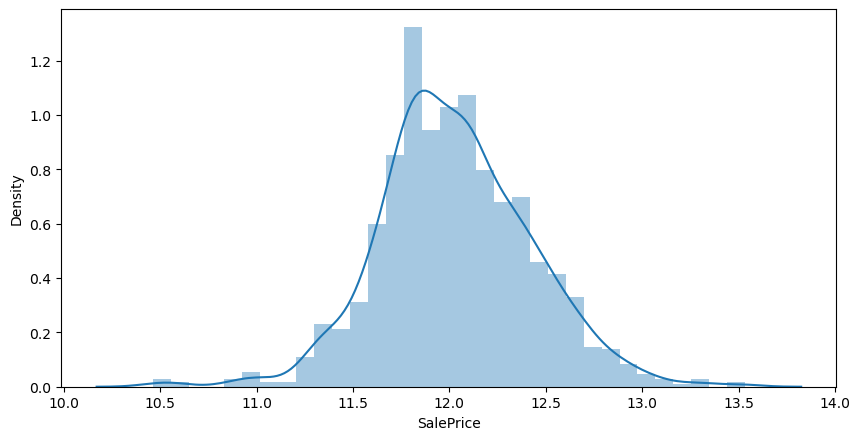

In [324]:
sns.distplot(np.log1p(df_train["SalePrice"]))

The target variable is somewhat gaussian.

In [325]:
num_df

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     127         120         71.0     4928            6            5   
1     889          20         95.0    15865            8            6   
2     793          60         92.0     9920            7            5   
3     110          20        105.0    11751            6            6   
4     422          20         71.0    16635            6            7   
...   ...         ...          ...      ...          ...          ...   
1163  289          20         71.0     9819            5            5   
1164  554          20         67.0     8777            4            5   
1165  196         160         24.0     2280            6            6   
1166   31          70         50.0     8500            4            4   
1167  617          60         71.0     7861            6            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0          1976          1976         0.0         120        958         1078   
1          1970          1970         0.0         351       1043         2217   
2          1996          1997         0.0         862        255         1117   
3          1977          1977       480.0         705       1139         1844   
4          1977          2000       126.0        1246        356         1602   
...         ...           ...         ...         ...        ...          ...   
1163       1967          1967        31.0         450        432          882   
1164       1949          2003         0.0           0          0            0   
1165       1976          1976         0.0         566        289          855   
1166       1920          1950         0.0           0        649          649   
1167       2002          2003         0.0         457        326          783   

      1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0          958         0        958             0         2         0   
1         2217         0       2217             1         2         0   
2         1127       886       2013             1         2         1   
3         1844         0       1844             0         2         0   
4         1602         0       1602             0         2         0   
...        ...       ...        ...           ...       ...       ...   
1163       900         0        900             0         1         0   
1164      1126         0       1126             0         2         0   
1165       855       601       1456             0         2         1   
1166       649       668       1317             0         1         0   
1167       807       702       1509             1         2         1   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0                2             5           1       1977.0           2   
1                4             8           1       1970.0           2   
2                3             8           1       1997.0           2   
3                3             7           1       1977.0           2   
4                3             8           1       1977.0           2   
...            ...           ...         ...          ...         ...   
1163             3             5           0       1970.0           1   
1164             2             5           0       2002.0           2   
1165             3             7           1       1976.0           2   
1166             3             6           0       1920.0           1   
1167             3             7           1       2002.0           2   

      GarageArea  WoodDeckSF  OpenPorchSF  MoSold  YrSold  SalePrice  
0            440           0          205       2    2007     128000  
1            621          81          207      10    2007     268000  
2            455         180          130       6    2007     269790  
3            546           0          122       1    2010     190000  
4            529         240            0       

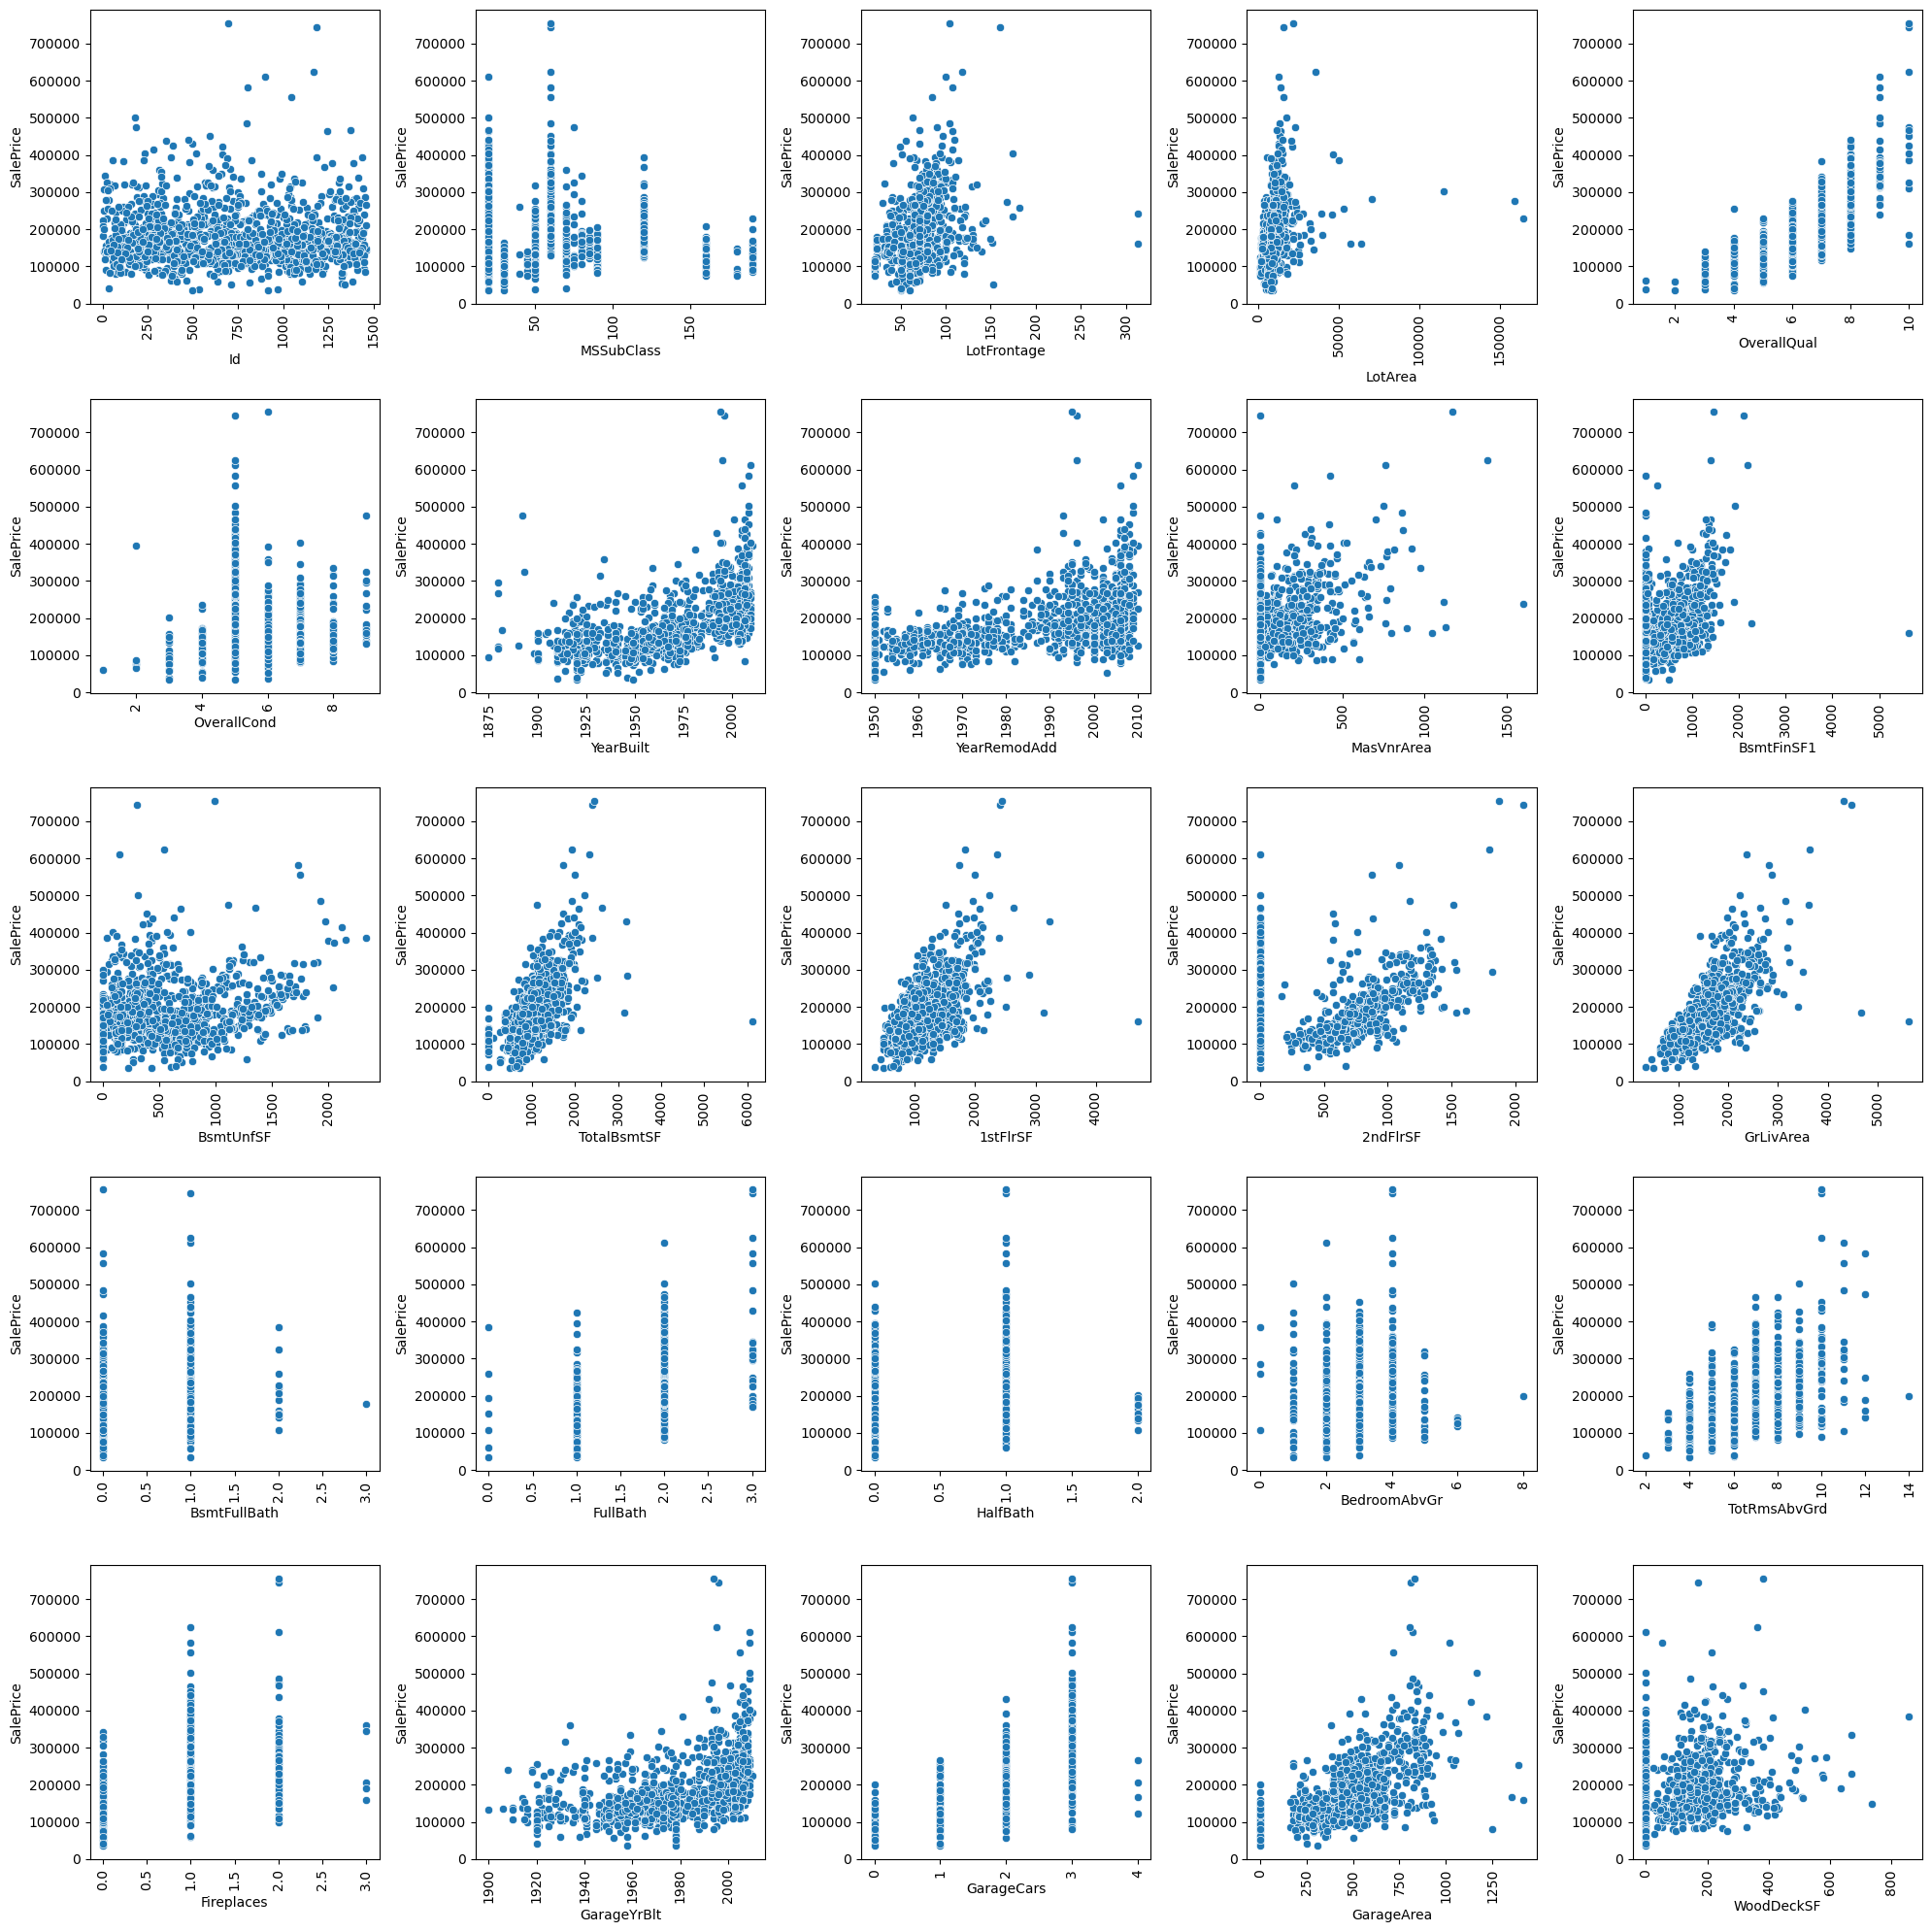

In [326]:
plt.figure(figsize=(20,20))
x=1
for i in num_df.columns.drop("SalePrice"):
    if x<=25:
        plt.subplot(5,5,x)
        sns.scatterplot(x=df_train[i],y=df_train["SalePrice"])
        plt.xticks(rotation=90)
        x+=1
plt.tight_layout()
plt.show()

**We can check the correlation of numeric features with the target variable and check which features have multicollinearity and which of those are correlated with target variable.**

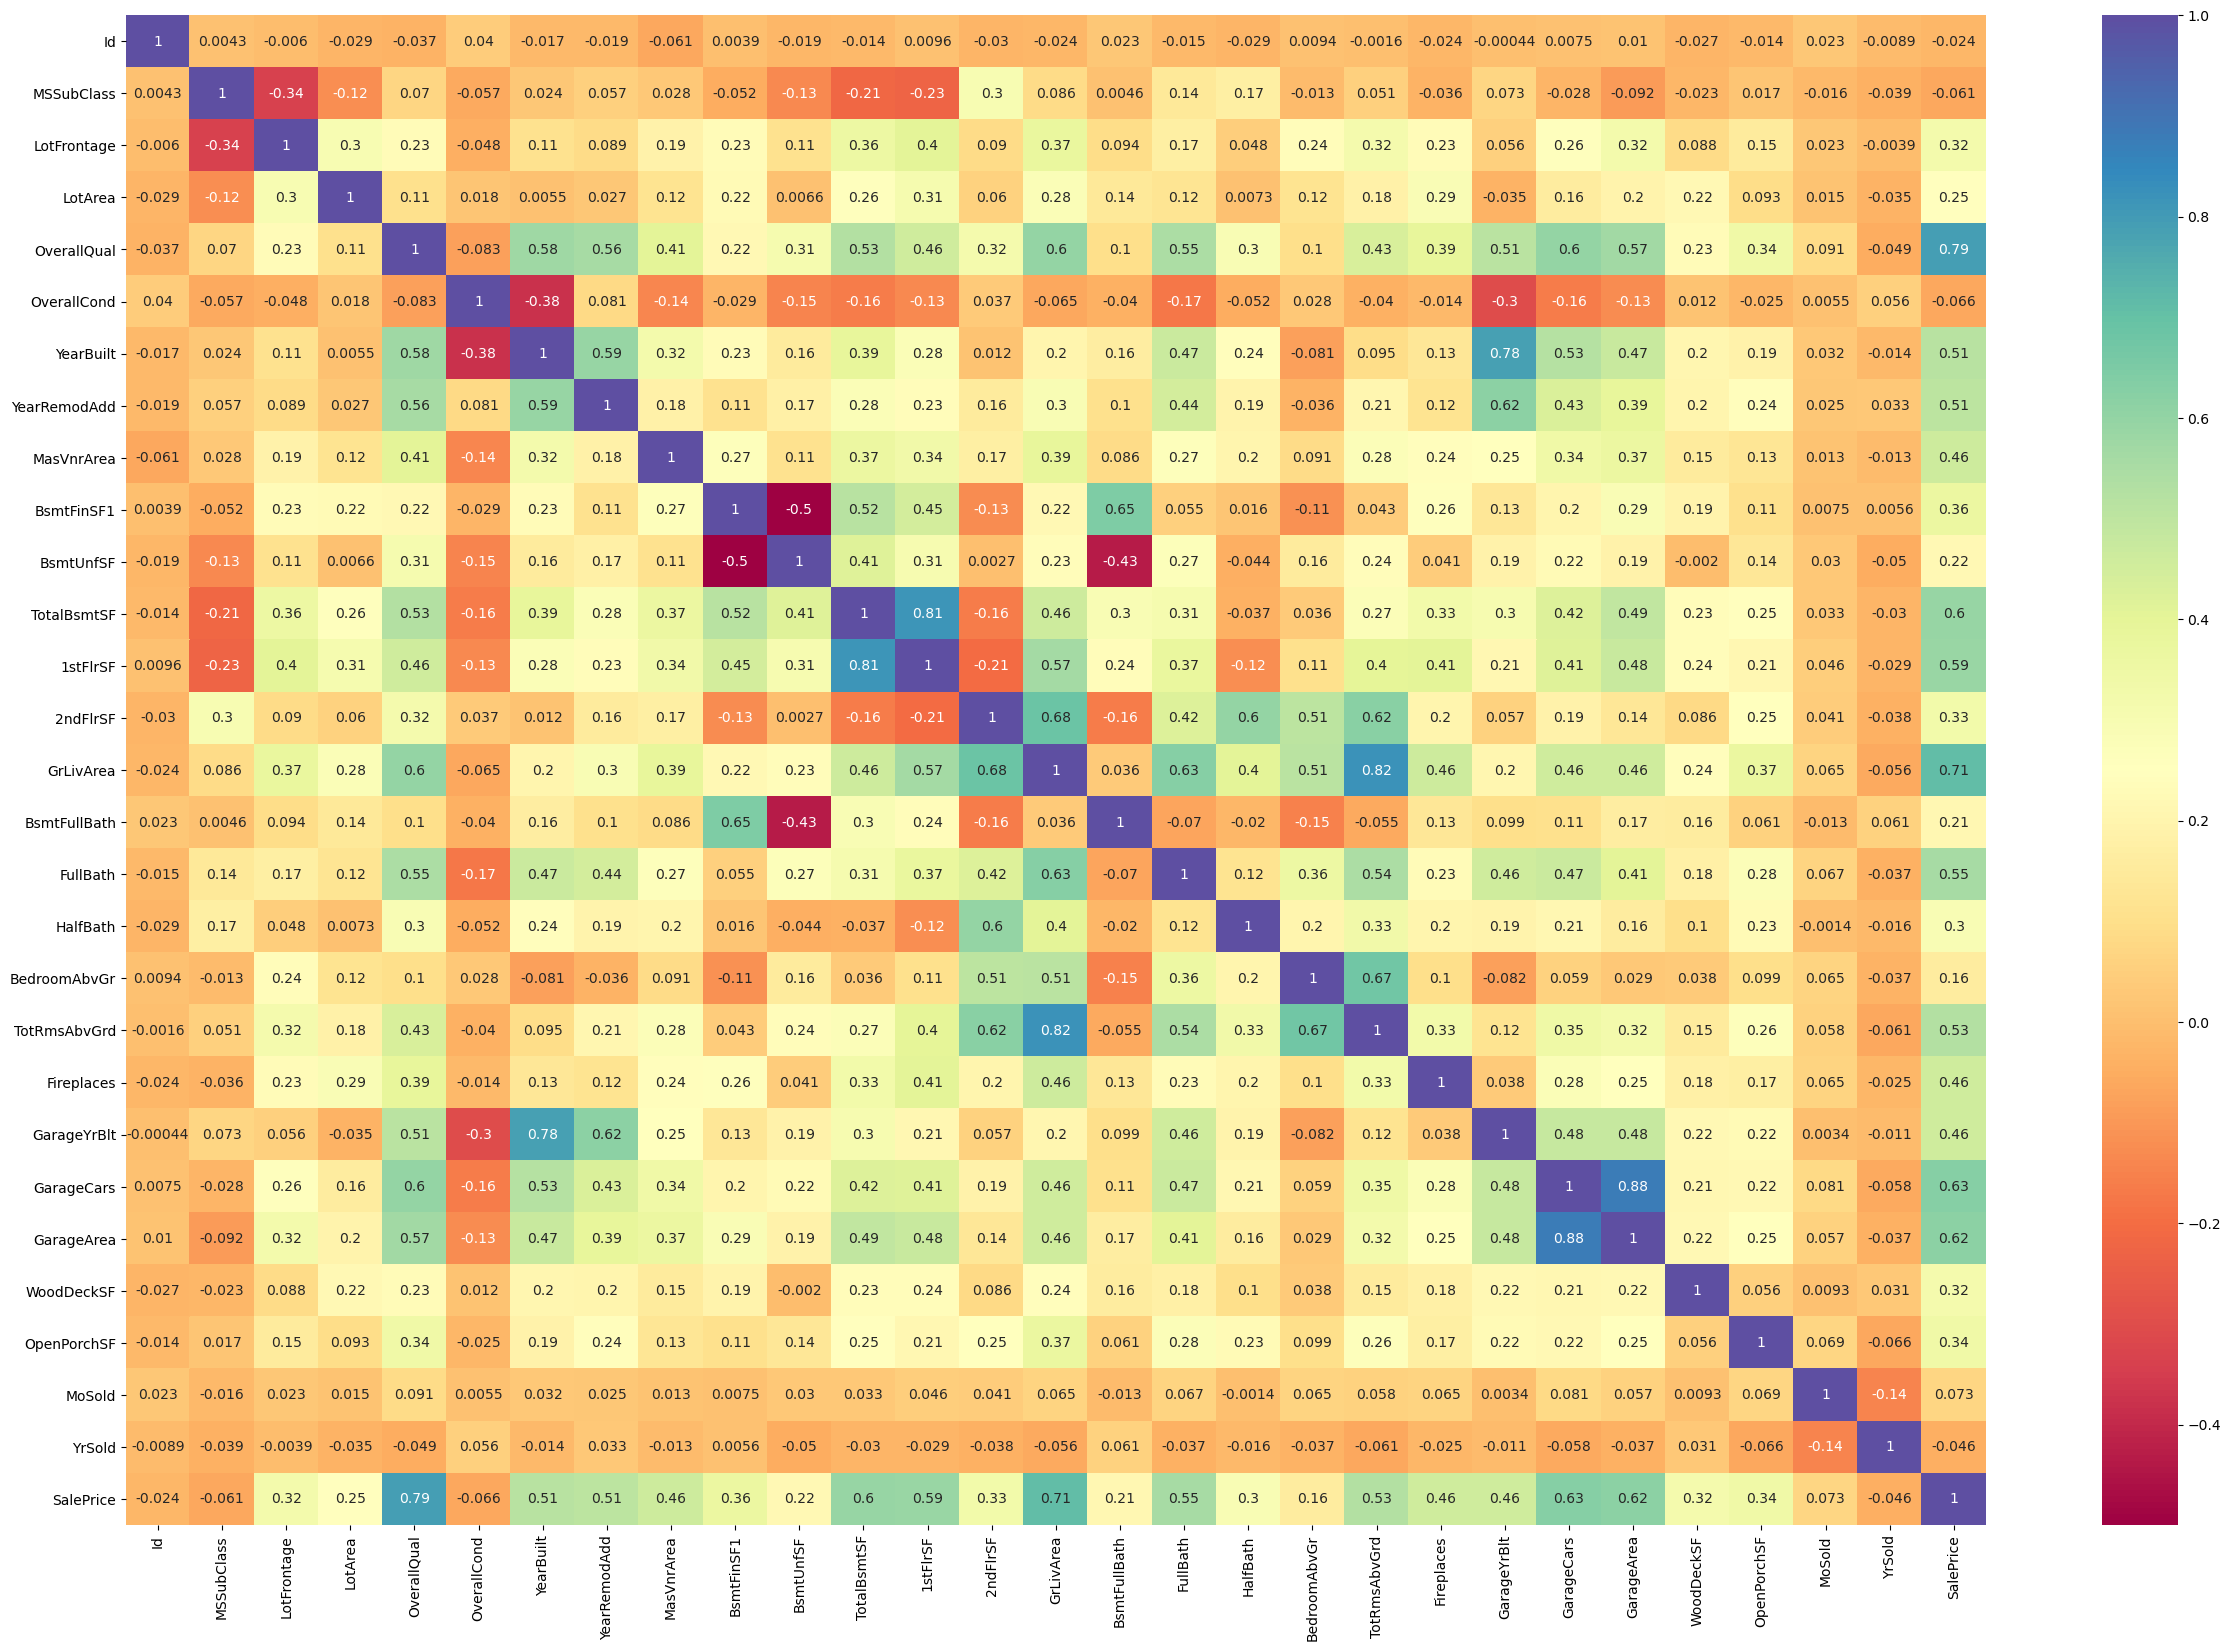

In [327]:
plt.figure(figsize = (30, 20))
sns.heatmap(num_df.corr(), annot = True, cmap="Spectral")
plt.show()

In [328]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler=StandardScaler()
x_scaler=scaler.fit_transform(num_df)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=num_df.columns
vif


quality       feature
0     1.022628            Id
1     1.466405    MSSubClass
2     1.520904   LotFrontage
3     1.281999       LotArea
4     3.720940   OverallQual
5     1.598719   OverallCond
6     4.655600     YearBuilt
7     2.418092  YearRemodAdd
8     1.412971    MasVnrArea
9     9.167822    BsmtFinSF1
10    8.826314     BsmtUnfSF
11   11.219806   TotalBsmtSF
12   69.706685      1stFlrSF
13   86.047994      2ndFlrSF
14  121.638872     GrLivArea
15    2.008086  BsmtFullBath
16    2.924133      FullBath
17    2.144835      HalfBath
18    2.386793  BedroomAbvGr
19    4.479422  TotRmsAbvGrd
20    1.533865    Fireplaces
21    3.422934   GarageYrBlt
22    5.339318    GarageCars
23    5.388574    GarageArea
24    1.201021    WoodDeckSF
25    1.260097   OpenPorchSF
26    1.045463        MoSold
27    1.048680        YrSold
28    4.894517     SalePrice

##### We can drop Id, TotRmsAbvGrd,GarageArea,1stFlrSF and 2ndFlrSF as they have higher vif and recheck heatmap again

In [331]:
num_df.drop(['Id', 'TotRmsAbvGrd' ,'2ndFlrSF',"GarageArea","1stFlrSF","GarageYrBlt"],axis=1,inplace=True)

In [332]:
num_df.shape

(1168, 23)

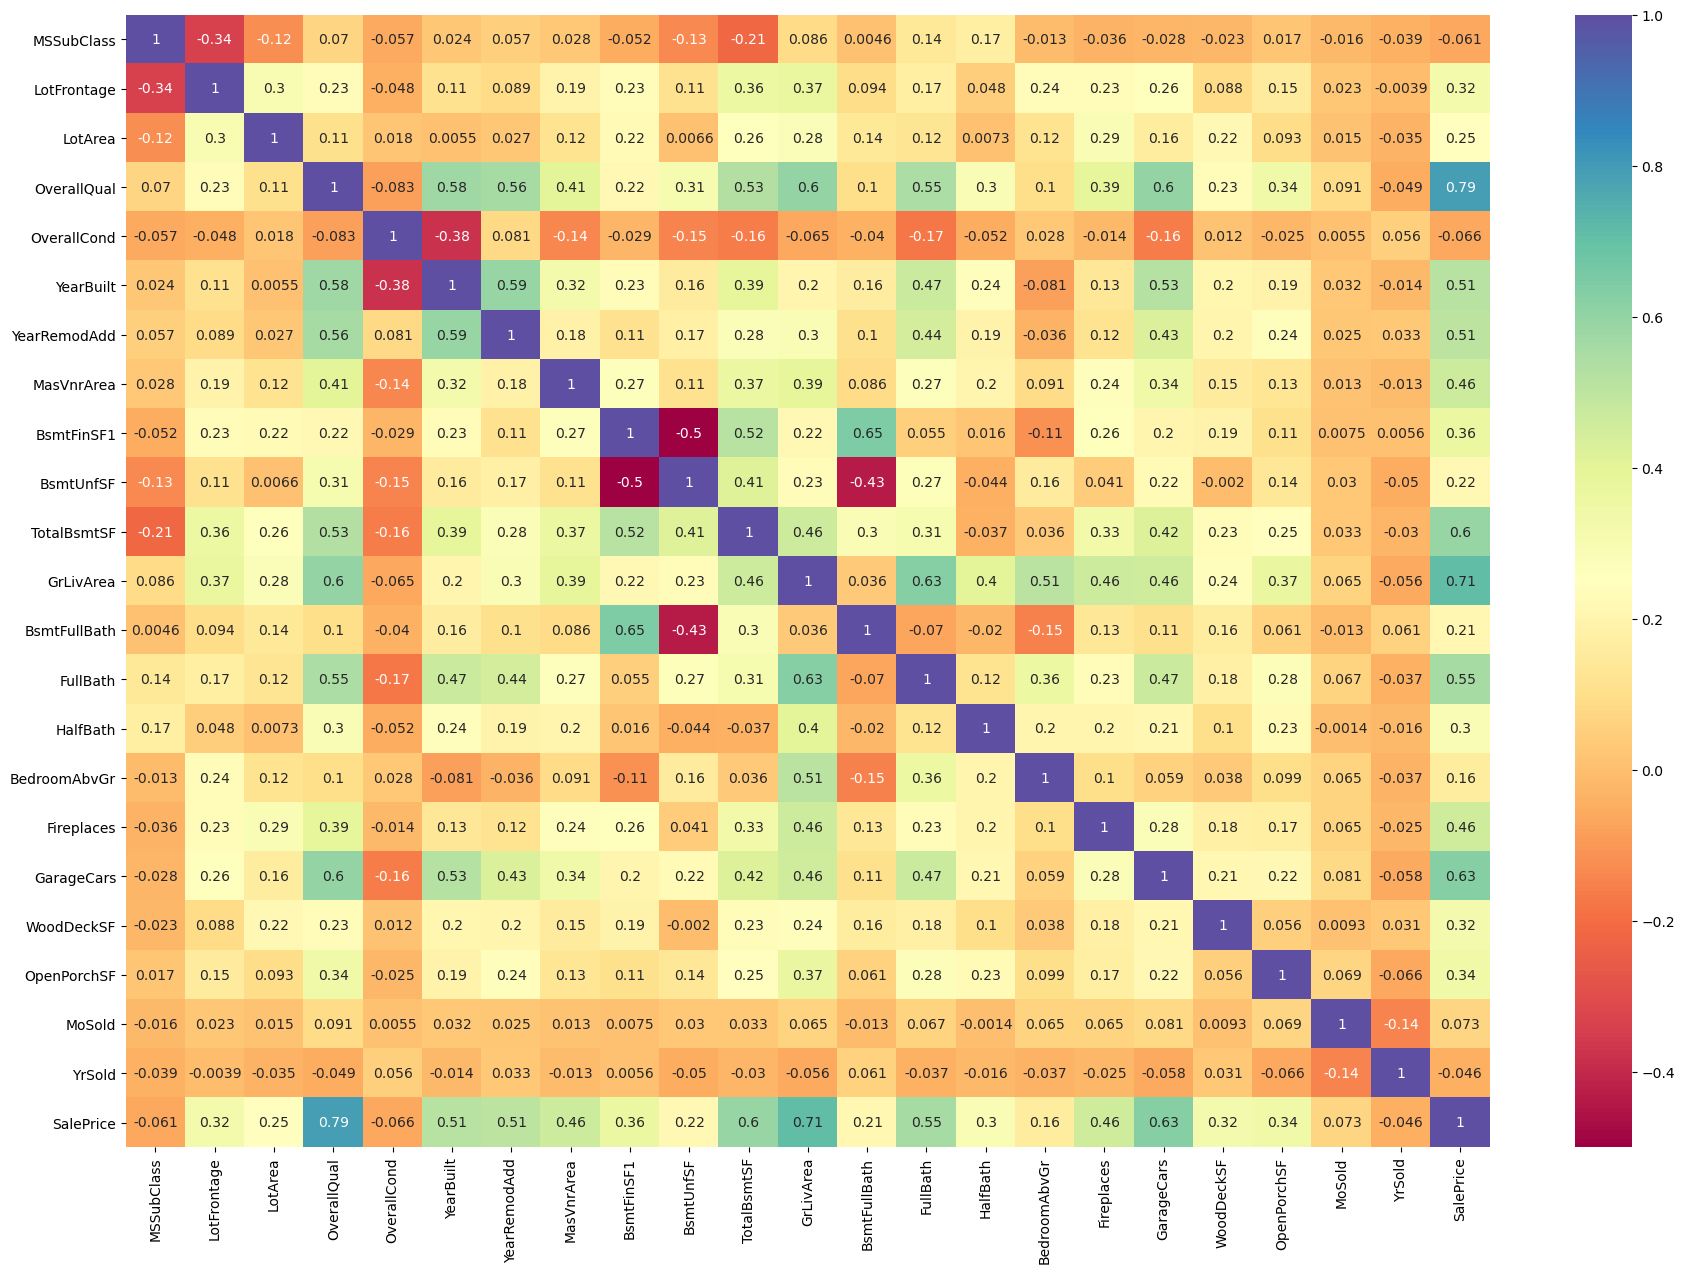

In [334]:
plt.figure(figsize = (22, 15))
sns.heatmap(num_df.corr(), annot=True,cmap="Spectral")
plt.show()

### Encoding cat_df:

In [335]:
cat_df.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')

In [336]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_df.columns:
    cat_df[col] = le.fit_transform(cat_df[col])    

**We can check the correlation of categorical features with the target variable and check which features have multicollinearity and which of those are correlated with target variable.**

In [339]:
cat_df["SalePrice"]=num_df["SalePrice"].copy()# adding Target column to compare correlations with categorical columns

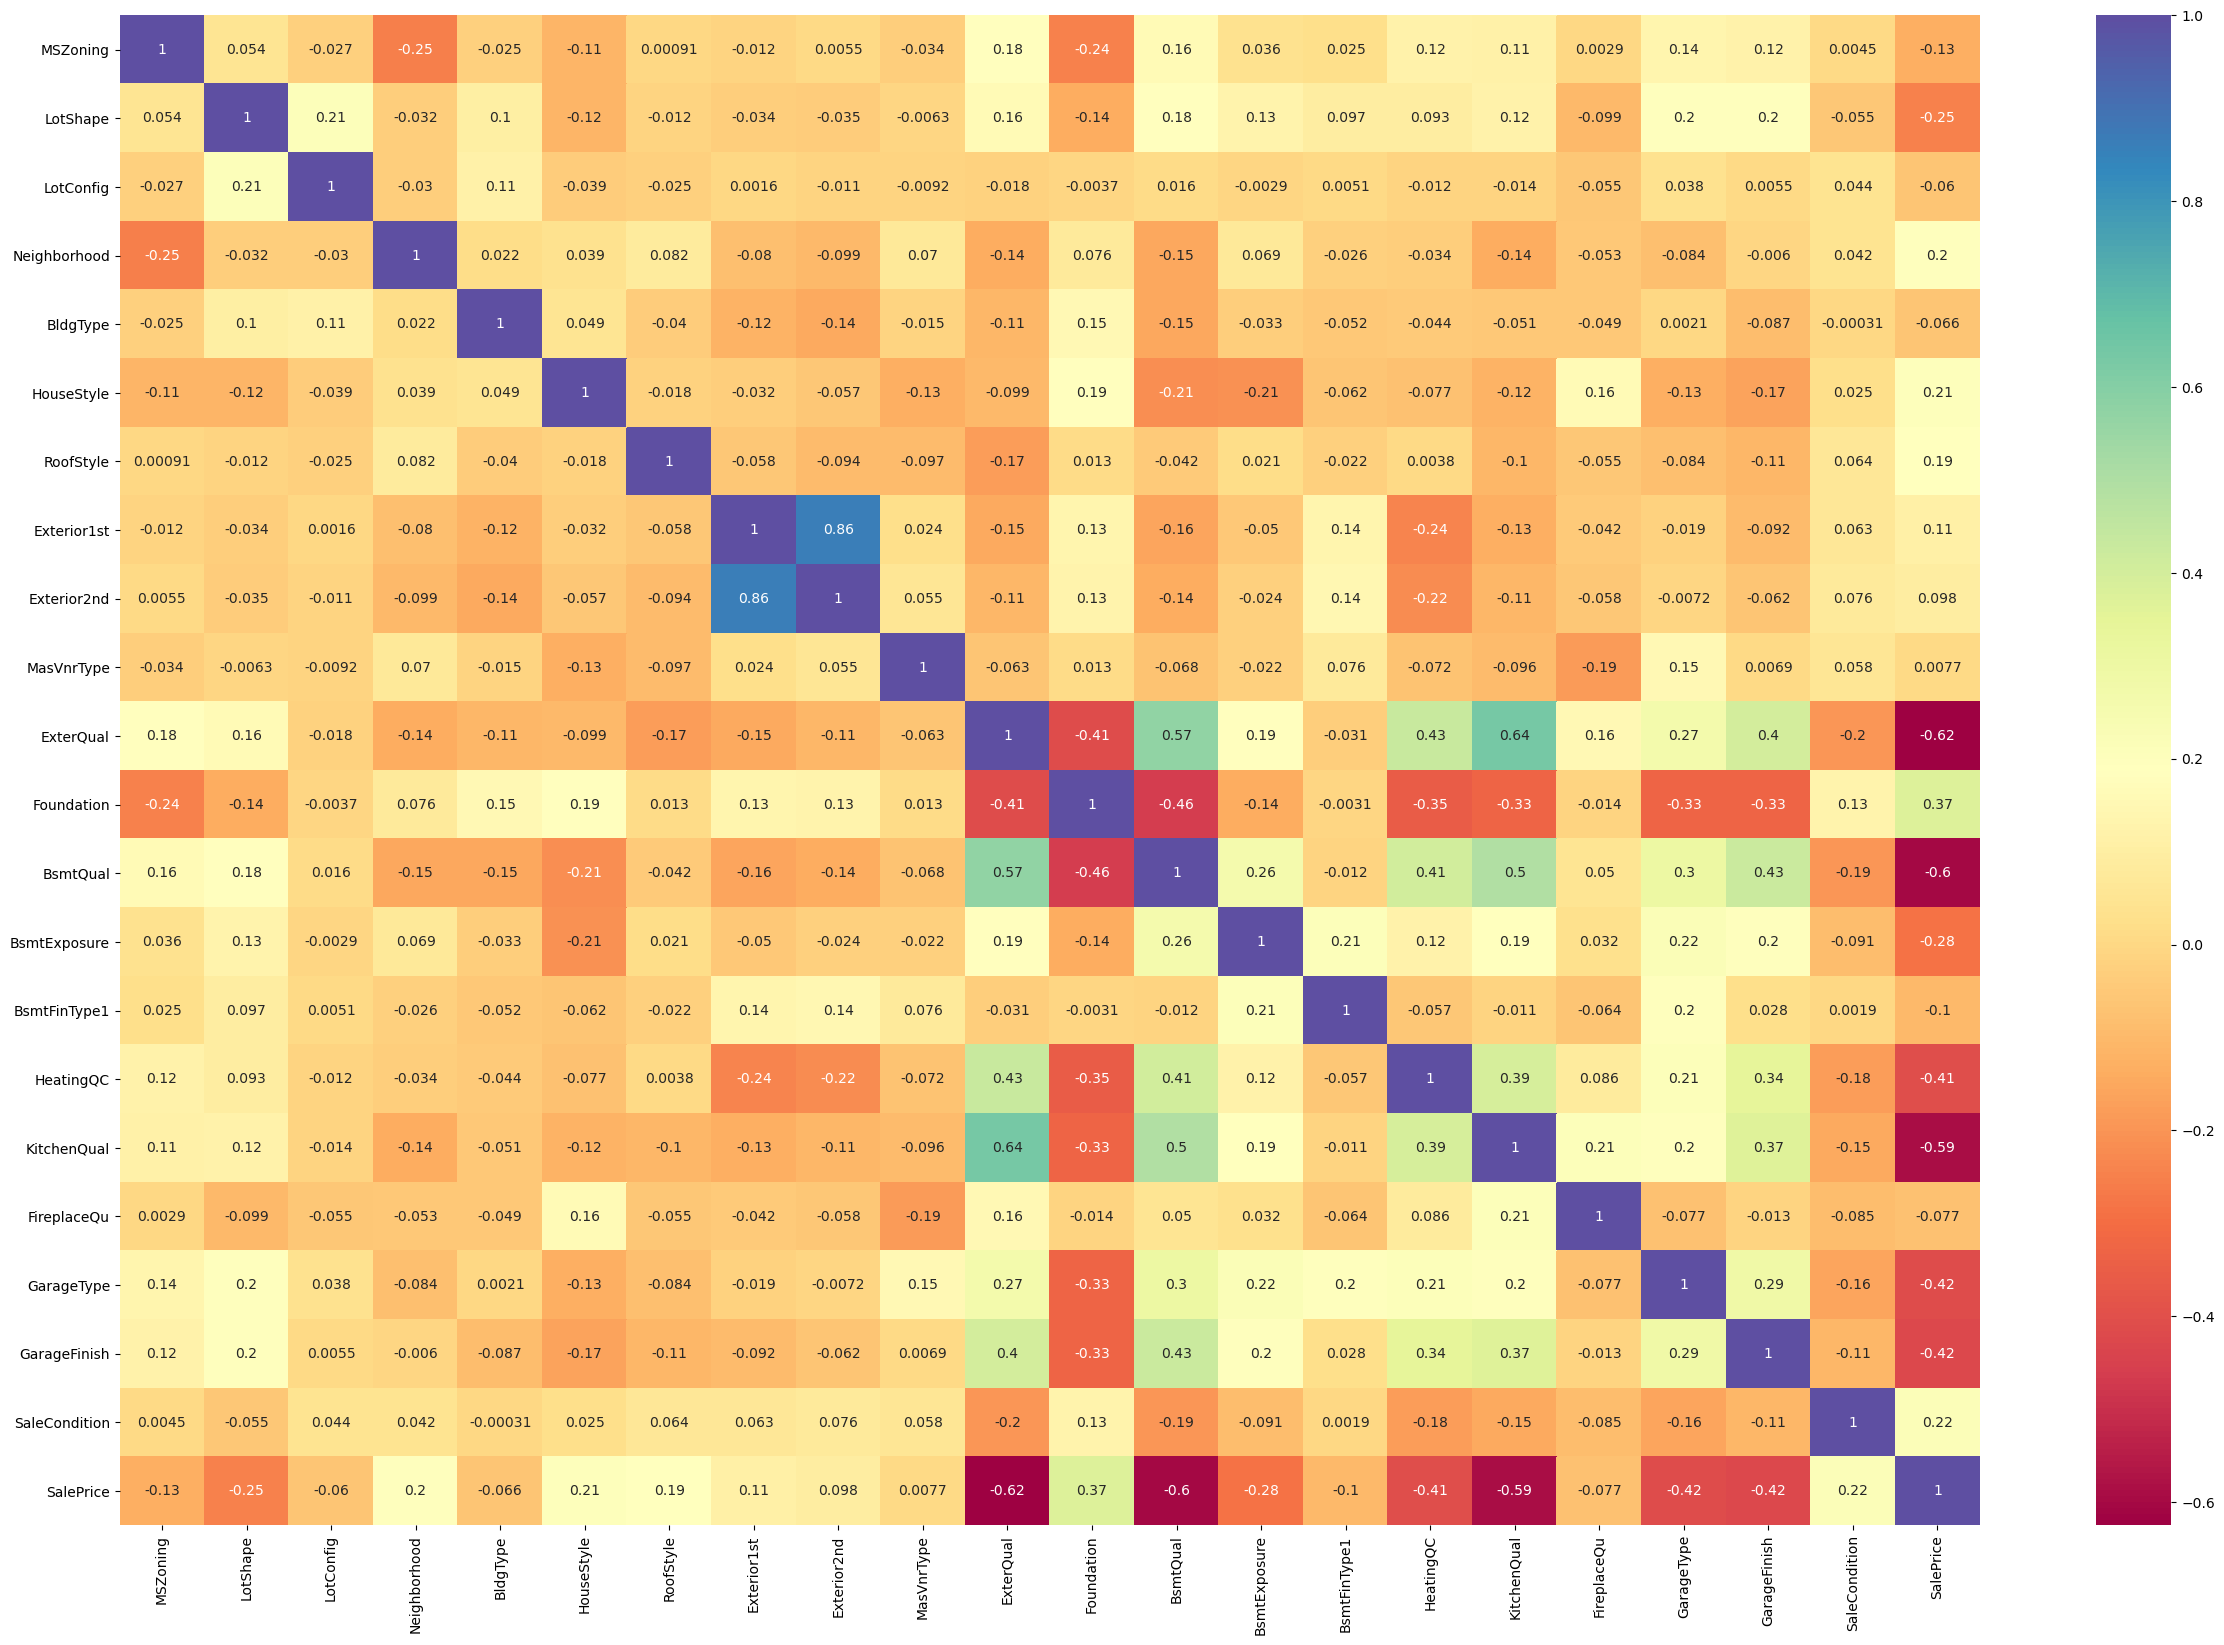

In [340]:
plt.figure(figsize = (30, 20))
sns.heatmap(cat_df.corr(), annot = True, cmap="Spectral")
plt.show()

In [341]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler=StandardScaler()
x_scaler=scaler.fit_transform(cat_df)

vif2=pd.DataFrame()
vif2["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif2["feature"]=cat_df.columns
vif2


quality        feature
0   1.158881       MSZoning
1   1.168890       LotShape
2   1.070018      LotConfig
3   1.171660   Neighborhood
4   1.173248       BldgType
5   1.175063     HouseStyle
6   1.115025      RoofStyle
7   4.063536    Exterior1st
8   4.110118    Exterior2nd
9   1.123734     MasVnrType
10  2.344765      ExterQual
11  1.509997     Foundation
12  2.090171       BsmtQual
13  1.228464   BsmtExposure
14  1.141221   BsmtFinType1
15  1.454670      HeatingQC
16  2.006068    KitchenQual
17  1.154278    FireplaceQu
18  1.408681     GarageType
19  1.427905   GarageFinish
20  1.091943  SaleCondition
21  2.645533      SalePrice

In [342]:
cat_df.drop(["Exterior2nd","SalePrice"],axis=1,inplace=True) 
#now we can drop SalePrice as its already in the num_df and we have achieved our objective of comparing correlations.

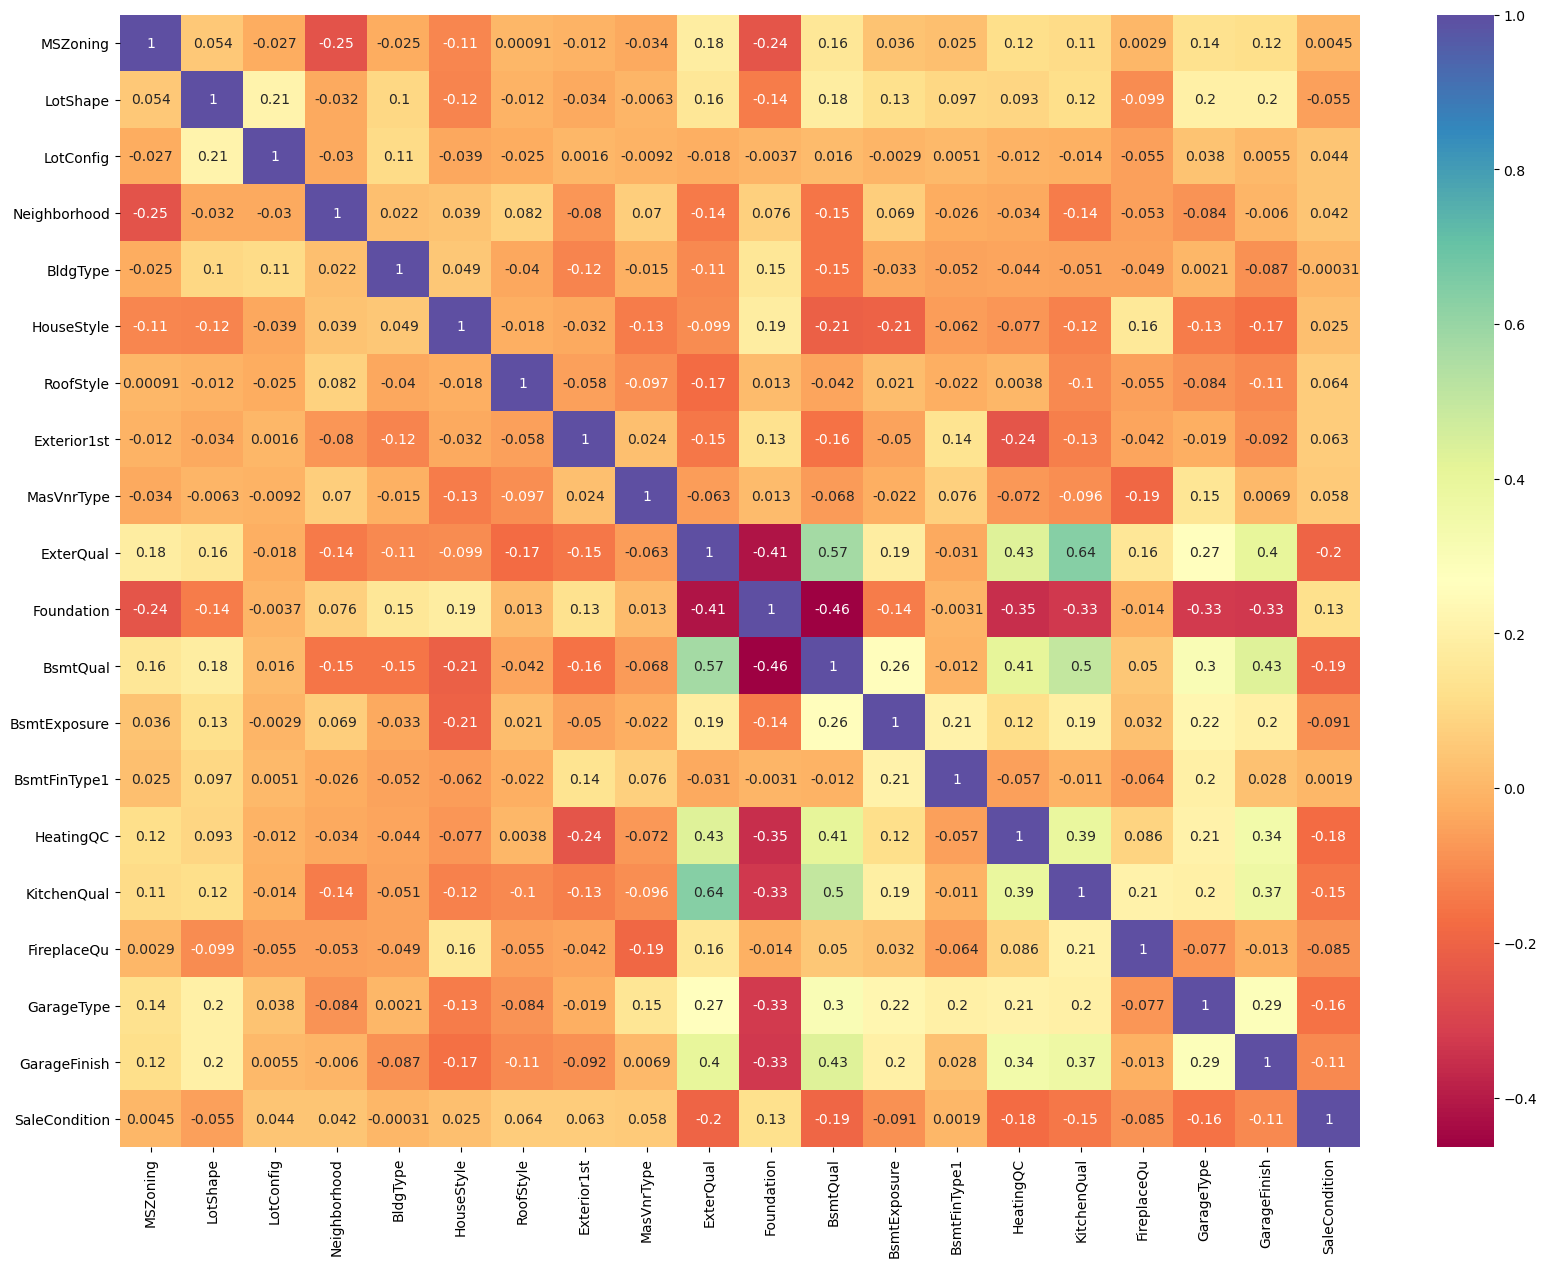

In [343]:
plt.figure(figsize = (20, 15))
sns.heatmap(cat_df.corr(), annot = True, cmap="Spectral")
plt.show()

__Now, we can add the cat_df and num_df back into df_train or we can create a new dataframe.__

In [350]:
df_train2=pd.concat([num_df,cat_df],axis=1)

In [351]:
df_train2

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            120         71.0     4928            6            5       1976   
1             20         95.0    15865            8            6       1970   
2             60         92.0     9920            7            5       1996   
3             20        105.0    11751            6            6       1977   
4             20         71.0    16635            6            7       1977   
...          ...          ...      ...          ...          ...        ...   
1163          20         71.0     9819            5            5       1967   
1164          20         67.0     8777            4            5       1949   
1165         160         24.0     2280            6            6       1976   
1166          70         50.0     8500            4            4       1920   
1167          60         71.0     7861            6            5       2002   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  \
0             1976         0.0         120        958         1078        958   
1             1970         0.0         351       1043         2217       2217   
2             1997         0.0         862        255         1117       2013   
3             1977       480.0         705       1139         1844       1844   
4             2000       126.0        1246        356         1602       1602   
...            ...         ...         ...        ...          ...        ...   
1163          1967        31.0         450        432          882        900   
1164          2003         0.0           0          0            0       1126   
1165          1976         0.0         566        289          855       1456   
1166          1950         0.0           0        649          649       1317   
1167          2003         0.0         457        326          783       1509   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageCars  \
0                0         2         0             2           1           2   
1                1         2         0             4           1           2   
2                1         2         1             3           1           2   
3                0         2         0             3           1           2   
4                0         2         0             3           1           2   
...            ...       ...       ...           ...         ...         ...   
1163             0         1         0             3           0           1   
1164             0         2         0             2           0           2   
1165             0         2         1             3           1           2   
1166             0         1         0             3           0           1   
1167             1         2         1             3           1           2   

      WoodDeckSF  OpenPorchSF  MoSold  YrSold  SalePrice  MSZoning  LotShape  \
0              0          205       2    2007     128000         3         0   
1             81          207      10    2007     268000         3         0   
2            180          130       6    2007     269790         3         0   
3              0          122       1    2010     190000         3         0   
4            240            0       6    2009     215000         3         0   
...          ...          ...     ...     ...        ...       ...       ...   
1163           0            0       2    2010     122000         3         0   
1164           0           96       5    2009     108000         3         3   
1165          87            0       7    2009     148500         3         3   
1166           0           54       7    2008      40000         0         3   
1167         100           75       6    2006     183200         3         0   

      LotConfig  Neighborhood  BldgType  HouseStyle  RoofStyle  Exterior1st  \
0             4            13         4           2          1            8   
1   

### Checking Outliers:

In [352]:
z = np.abs(zscore(df_train2))
z.shape

(1168, 43)

In [367]:
threshold = 3
df_new=df_train2[(z<3).all(axis=1)]

In [368]:
df_new.shape, df_train.shape

((869, 43), (1168, 50))

In [369]:
#Data Loss %:
(1168-869) / 1168 *100  

25.59931506849315

###### We won't be removing outliers as the data loss is massive and there wouldnt be enough data to properly train the model.


### Splitting the dataset:

In [371]:
x=df_train2.drop(["SalePrice"],axis=1,inplace=False)
y=df_train["SalePrice"]

### Checking Skewness:

In [372]:
x.skew()

MSSubClass        1.422019
LotFrontage       2.710100
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.834688
BsmtFinSF1        1.871606
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
GrLivArea         1.449952
BsmtFullBath      0.627106
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
Fireplaces        0.671966
GarageCars       -0.358556
WoodDeckSF        1.504929
OpenPorchSF       2.410840
MoSold            0.220979
YrSold            0.115765
MSZoning         -1.796785
LotShape         -0.603775
LotConfig        -1.118821
Neighborhood      0.043735
BldgType          2.318657
HouseStyle        0.285680
RoofStyle         1.498560
Exterior1st      -0.612816
MasVnrType       -0.104609
ExterQual        -1.810843
Foundation       -0.002761
BsmtQual         -0.487530
BsmtExposure     -1.075098
BsmtFinType1      0.100811
HeatingQC         0.449933
K

In [373]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
df_sk=pd.DataFrame(x_new,columns=x.columns)
df_sk.skew()

MSSubClass       0.064007
LotFrontage      0.161430
LotArea          0.032509
OverallQual      0.021658
OverallCond      0.048063
YearBuilt       -0.126641
YearRemodAdd    -0.225131
MasVnrArea       0.416372
BsmtFinSF1      -0.404528
BsmtUnfSF       -0.284390
TotalBsmtSF      0.286779
GrLivArea       -0.000054
BsmtFullBath     0.365488
FullBath        -0.045944
HalfBath         0.498003
BedroomAbvGr     0.116498
Fireplaces       0.084950
GarageCars      -0.022970
WoodDeckSF       0.113026
OpenPorchSF     -0.002749
MoSold          -0.035838
YrSold           0.112893
MSZoning         0.233113
LotShape        -0.594207
LotConfig       -1.030401
Neighborhood    -0.146541
BldgType         1.857194
HouseStyle      -0.080331
RoofStyle       -0.292233
Exterior1st     -0.338023
MasVnrType      -0.016203
ExterQual       -0.605112
Foundation       0.004296
BsmtQual        -0.254027
BsmtExposure    -0.645025
BsmtFinType1    -0.159718
HeatingQC        0.156511
KitchenQual     -0.435558
FireplaceQu 

__We can see have successfully reduced the skewness to a great extent and the dataset has been more or less converted to a gaussian distribution__

In [216]:
#df_sk["SalePrice"]=df_train2["SalePrice"].copy()

In [374]:
df_sk.shape

(1168, 42)

### Scaling the whole dataset:

In [375]:
df_sk

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       1.370435     0.094079 -1.213954    -0.052799    -0.496528   0.026859   
1      -1.167999     1.117032  1.100521     1.345826     0.407009  -0.185817   
2       0.490047     0.998696  0.158048     0.656375    -0.496528   0.836680   
3      -1.167999     1.495477  0.496002    -0.052799     0.407009   0.063582   
4      -1.167999     0.094079  1.196626    -0.052799     1.234321   0.063582   
...          ...          ...       ...          ...          ...        ...   
1163   -1.167999     0.094079  0.137703    -0.785224    -0.496528  -0.287388   
1164   -1.167999    -0.096466 -0.084786    -1.545782    -0.496528  -0.835594   
1165    1.700798    -2.852787 -2.681835    -0.052799     0.407009   0.026859   
1166    0.696557    -0.996387 -0.148203    -1.545782    -1.498082  -1.530544   
1167    0.490047     0.094079 -0.302416    -0.052799    -0.496528   1.113154   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  \
0        -0.613054   -0.822733   -0.112649   0.903777     0.099335  -1.236502   
1        -0.854247   -0.822733    0.394677   1.027313     2.374300   1.295050   
2         0.495717   -0.822733    0.925416  -0.504500     0.185571   1.003880   
3        -0.569998    1.382993    0.797133   1.160517     1.674462   0.739356   
4         0.694762    1.138563    1.176115  -0.226633     1.200095   0.314931   
...            ...         ...         ...        ...          ...        ...   
1163     -0.964508    0.788397    0.530842  -0.044579    -0.347643  -1.424968   
1164      0.905817   -0.822733   -1.347679  -2.042746    -3.155621  -0.748915   
1165     -0.613054   -0.822733    0.663505  -0.405295    -0.411204   0.026617   
1166     -1.478940   -0.822733   -1.347679   0.396272    -0.915738  -0.276125   
1167      0.905817   -0.822733    0.539557  -0.304187    -0.583400   0.134493   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageCars  \
0        -0.837006  0.802290 -0.782707     -1.083459    0.777879    0.259753   
1         1.176812  0.802290 -0.782707      1.356214    0.777879    0.259753   
2         1.176812  0.802290  1.268421      0.151784    0.777879    0.259753   
3        -0.837006  0.802290 -0.782707      0.151784    0.777879    0.259753   
4        -0.837006  0.802290 -0.782707      0.151784    0.777879    0.259753   
...            ...       ...       ...           ...         ...         ...   
1163     -0.837006 -1.018713 -0.782707      0.151784   -1.028333   -1.063204   
1164     -0.837006  0.802290 -0.782707     -1.083459   -1.028333    0.259753   
1165     -0.837006  0.802290  1.268421      0.151784    0.777879    0.259753   
1166     -0.837006 -1.018713 -0.782707      0.151784   -1.028333   -1.063204   
1167      1.176812  0.802290  1.268421      0.151784    0.777879    0.259753   

      WoodDeckSF  OpenPorchSF    MoSold    YrSold  MSZoning  LotShape  \
0      -0.959773     1.409990 -1.719437 -0.604806 -0.162456 -1.366794   
1       0.781991     1.414498  1.320612 -0.604806 -0.162456 -1.366794   
2       1.043999     1.198911 -0.076750 -0.604806 -0.162456 -1.366794   
3      -0.959773     1.169545 -2.209015  1.649761 -0.162456 -1.366794   
4       1.135369    -1.061392 -0.076750  0.899576 -0.162456 -1.366794   
...          ...          ...       ...       ...       ...       ...   
1163   -0.959773    -1.061392 -1.719437  1.649761 -0.162456 -1.366794   
1164   -0.959773     1.058911 -0.456480  0.899576 -0.162456  0.753907   
1165    0.805928    -1.061392  0.288878  0.899576 -0.162456  0.753907   
1166   -0.959773     0.794809  0.288878  0.148070 -2.926464  0.753907   
1167    0.852307     0.945305 -0.076750 -1.359003 -0.162456 -1.366794   

      LotConfig  Neighborhood  BldgType  HouseStyle  RoofStyle  Exterior1st  \
0      0.617281      0.198357  2.310950   -0.463401  -0.388056    -0.326182   
1      0.617281      0.037086 -0.436548   -0.463401  -5.058580     1.159356 

In [376]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(df_sk)

In [377]:
#PCA
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(x_scaler)

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 20.27482157,  27.85167245,  34.76278578,  40.41148206,
        44.21389304,  47.84304748,  51.14248119,  54.16041951,
        56.89306135,  59.48931247,  61.85434461,  64.19363193,
        66.49399153,  68.69340653,  70.71687935,  72.70762969,
        74.6383991 ,  76.53379333,  78.27805294,  79.99851539,
        81.63000095,  83.21800277,  84.64596078,  86.01832205,
        87.32706085,  88.58568178,  89.77034918,  90.88619258,
        91.98352306,  92.94003398,  93.88211478,  94.76853058,
        95.54458194,  96.28387061,  96.99485938,  97.68097647,
        98.24052231,  98.77371267,  99.24885139,  99.58532647,
        99.81127005, 100.        ])

In [378]:
# PCs explaines 95% of the variance?
k=np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: ",k)

Number of components explaining 95% variance:  32


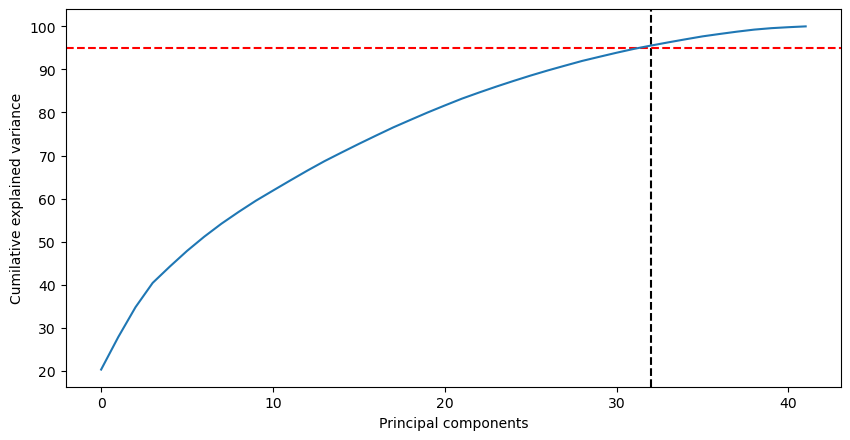

In [379]:
plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=95,color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

In [380]:
FinalPCA=PCA(n_components=32)
FinalData=FinalPCA.fit_transform(x_scaler)

FinalData2=pd.DataFrame(FinalData)
FinalData2

0         1         2         3         4         5         6   \
0    -0.719641  0.634247  1.550459  0.608284  0.716172 -0.858794 -0.259179   
1     2.521962 -2.259842 -1.603640 -0.216318 -2.087800  0.735286  1.083737   
2     2.818634 -1.539048  0.529252  1.621086 -1.932339 -0.633208  0.154260   
3     1.211342 -2.173375 -1.754369  0.296435  2.188914 -0.843797  0.194634   
4     1.580947 -2.451153 -0.409002 -0.381888 -0.845843 -0.027522 -0.586117   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -3.326734 -1.351630 -0.259957 -0.350191  1.068931 -1.797422 -0.534750   
1164 -2.004211  2.056922 -0.000785 -1.252005 -1.978072 -1.929613  0.039934   
1165 -1.324261  1.337704  3.247087  2.910820  0.017345  0.521108 -0.739561   
1166 -3.920798  1.466689 -1.012622  0.892772  0.826344 -1.437831 -1.787872   
1167  2.855083  0.282500  1.153974  0.243813 -1.864478 -0.366531  0.518574   

            7         8         9         10        11        12        13  \
0     1.928772  1.023655 -0.545711 -1.213988 -2.468146 -0.924290  0.384056   
1     3.250454 -1.319717  2.467585 -3.361306 -1.649047 -0.507185 -0.247368   
2     1.400094  0.268523 -0.744856 -0.290981 -0.250942 -0.272982 -0.236990   
3    -1.632989  2.081374  0.098985 -1.450971 -1.679524 -0.467662  0.447789   
4     0.184718  1.624829 -1.201000 -2.062026  0.083072  0.652925  1.940103   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -1.182009  1.056860 -0.346281 -0.671790 -0.100885 -0.807183 -0.840804   
1164 -2.157331 -0.534986  1.335123  0.702210 -0.800249  1.224440  0.756983   
1165  0.668767  1.010603 -0.736898 -1.602184  0.011426 -0.087334  0.804739   
1166  0.718246 -0.616483 -0.133059  0.818056  0.742495 -1.590982  0.625824   
1167  0.046679 -0.936451  0.562206  1.317107 -0.491361  0.100680  0.940348   

            14        15        16        17        18        19        20  \
0    -1.409289 -0.543819  1.170735 -0.544910  1.460581  0.087439 -0.057211   
1     0.669160 -0.231297 -1.025528  0.987049  0.257800 -0.746842 -0.390545   
2     0.236913 -1.068182  0.350714 -0.650853 -0.664409 -0.981855  0.356682   
3    -0.287863 -0.025347  0.789260 -1.044478  1.645307 -0.147784 -0.510092   
4    -0.994452  0.319474  0.518499 -0.084229 -0.022639  0.197115 -0.570823   
...        ...       ...       ...       ...       ...       ...       ...   
1163  0.215056  0.532997 -0.228414  0.768501  2.020227 -0.651792 -1.636369   
1164 -0.778398  0.234448 -0.368632 -0.559835 -0.089357  1.180823 -0.647700   
1165 -1.018438 -1.542396 -0.678063  0.218671  0.065267 -1.358484  1.831893   
1166  1.713093  0.721322  0.407444 -0.898603  0.770698  0.319571  0.998267   
1167 -0.438158  0.878358  0.690827  0.947140 -0.277752 -0.741521 -0.268744   

            21        22        23        24        25        26        27  \
0     0.753264 -0.576513  1.696650 -0.741388 -0.321621 -0.366525  1.402970   
1    -0.391289  0.408957 -0.235848  0.506014  0.996489  1.782287  0.795184   
2     0.297149  0.424717 -0.152534  0.139718  1.438641 -0.029267  0.165234   
3     0.384119 -0.007833  0.521683 -1.098724  0.766364 -1.354380  0.995462   
4    -0.213490  0.368987 -0.812713 -0.642624 -2.008052  0.523620  0.527853   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -0.498008  0.557793 -0.209649 -0.598947 -0.060880  0.299747  0.623894   
1164 -1.466873  0.031221  0.664982 -0.678349 -0.343795 -1.608048  0.309306   
1165  1.421823  0.151209 -0.430739 -0.864780 -1.658222  0.673919  0.213010   
1166  0.230065  1.462205  1.105158 -0.348402  0.753663 -0.489685 -0.841303   
1167 -0.001610 -1.012863  0.015034 -0.018843  0.541944 -0.060359 -0.146659   

            28        29        30        31  
0    -0.385058 -0.707580 -0.901933  0.138370  
1     0.733082  0.144952 -1.022183  0.102404  
2     0.650985 -0.388662  0.762786  0.769265  
3     0.057651 -0.411072  0.108150  0.798432  
4    -1.011112  1.536854 -0.7

In [381]:
x=FinalData2 # redefined the input features which have been reduced by PCA

In [382]:
x

0         1         2         3         4         5         6   \
0    -0.719641  0.634247  1.550459  0.608284  0.716172 -0.858794 -0.259179   
1     2.521962 -2.259842 -1.603640 -0.216318 -2.087800  0.735286  1.083737   
2     2.818634 -1.539048  0.529252  1.621086 -1.932339 -0.633208  0.154260   
3     1.211342 -2.173375 -1.754369  0.296435  2.188914 -0.843797  0.194634   
4     1.580947 -2.451153 -0.409002 -0.381888 -0.845843 -0.027522 -0.586117   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -3.326734 -1.351630 -0.259957 -0.350191  1.068931 -1.797422 -0.534750   
1164 -2.004211  2.056922 -0.000785 -1.252005 -1.978072 -1.929613  0.039934   
1165 -1.324261  1.337704  3.247087  2.910820  0.017345  0.521108 -0.739561   
1166 -3.920798  1.466689 -1.012622  0.892772  0.826344 -1.437831 -1.787872   
1167  2.855083  0.282500  1.153974  0.243813 -1.864478 -0.366531  0.518574   

            7         8         9         10        11        12        13  \
0     1.928772  1.023655 -0.545711 -1.213988 -2.468146 -0.924290  0.384056   
1     3.250454 -1.319717  2.467585 -3.361306 -1.649047 -0.507185 -0.247368   
2     1.400094  0.268523 -0.744856 -0.290981 -0.250942 -0.272982 -0.236990   
3    -1.632989  2.081374  0.098985 -1.450971 -1.679524 -0.467662  0.447789   
4     0.184718  1.624829 -1.201000 -2.062026  0.083072  0.652925  1.940103   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -1.182009  1.056860 -0.346281 -0.671790 -0.100885 -0.807183 -0.840804   
1164 -2.157331 -0.534986  1.335123  0.702210 -0.800249  1.224440  0.756983   
1165  0.668767  1.010603 -0.736898 -1.602184  0.011426 -0.087334  0.804739   
1166  0.718246 -0.616483 -0.133059  0.818056  0.742495 -1.590982  0.625824   
1167  0.046679 -0.936451  0.562206  1.317107 -0.491361  0.100680  0.940348   

            14        15        16        17        18        19        20  \
0    -1.409289 -0.543819  1.170735 -0.544910  1.460581  0.087439 -0.057211   
1     0.669160 -0.231297 -1.025528  0.987049  0.257800 -0.746842 -0.390545   
2     0.236913 -1.068182  0.350714 -0.650853 -0.664409 -0.981855  0.356682   
3    -0.287863 -0.025347  0.789260 -1.044478  1.645307 -0.147784 -0.510092   
4    -0.994452  0.319474  0.518499 -0.084229 -0.022639  0.197115 -0.570823   
...        ...       ...       ...       ...       ...       ...       ...   
1163  0.215056  0.532997 -0.228414  0.768501  2.020227 -0.651792 -1.636369   
1164 -0.778398  0.234448 -0.368632 -0.559835 -0.089357  1.180823 -0.647700   
1165 -1.018438 -1.542396 -0.678063  0.218671  0.065267 -1.358484  1.831893   
1166  1.713093  0.721322  0.407444 -0.898603  0.770698  0.319571  0.998267   
1167 -0.438158  0.878358  0.690827  0.947140 -0.277752 -0.741521 -0.268744   

            21        22        23        24        25        26        27  \
0     0.753264 -0.576513  1.696650 -0.741388 -0.321621 -0.366525  1.402970   
1    -0.391289  0.408957 -0.235848  0.506014  0.996489  1.782287  0.795184   
2     0.297149  0.424717 -0.152534  0.139718  1.438641 -0.029267  0.165234   
3     0.384119 -0.007833  0.521683 -1.098724  0.766364 -1.354380  0.995462   
4    -0.213490  0.368987 -0.812713 -0.642624 -2.008052  0.523620  0.527853   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -0.498008  0.557793 -0.209649 -0.598947 -0.060880  0.299747  0.623894   
1164 -1.466873  0.031221  0.664982 -0.678349 -0.343795 -1.608048  0.309306   
1165  1.421823  0.151209 -0.430739 -0.864780 -1.658222  0.673919  0.213010   
1166  0.230065  1.462205  1.105158 -0.348402  0.753663 -0.489685 -0.841303   
1167 -0.001610 -1.012863  0.015034 -0.018843  0.541944 -0.060359 -0.146659   

            28        29        30        31  
0    -0.385058 -0.707580 -0.901933  0.138370  
1     0.733082  0.144952 -1.022183  0.102404  
2     0.650985 -0.388662  0.762786  0.769265  
3     0.057651 -0.411072  0.108150  0.798432  
4    -1.011112  1.536854 -0.7

In [383]:
y

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

## Model Building:

### Best Random State

In [385]:
acc_max=0
rstate_max=0

for i in range(30,250):
    x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=.25,random_state=i)
    
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>acc_max:
        acc_max=acc
        rstate_max=i

print("Best accuracy is", acc_max,"at Random State",rstate_max)

Best accuracy is 0.8607271821970107 at Random State 216


In [386]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=.25,random_state=216)

## Model 1: Decision Tree Regressor

In [387]:
dt_reg_params = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "min_samples_split": [10, 20, 15],
              "max_depth": [5, 8, 11],
              "min_samples_leaf": [150, 200, 100],
              "max_leaf_nodes": [5,10,15]
              }
grid_dt_reg = GridSearchCV(DecisionTreeRegressor(), dt_reg_params)
grid_dt_reg.fit(x_train, y_train)

dt_reg = grid_dt_reg.best_estimator_
print("Best Estimators for Decision Tree Regression: ", grid_dt_reg.best_params_)
print("best r2 score: ",grid_dt_reg.best_score_)
print("------------------------------------------")

Best Estimators for Decision Tree Regression:  {'criterion': 'poisson', 'max_depth': 8, 'max_leaf_nodes': 10, 'min_samples_leaf': 100, 'min_samples_split': 10}
best r2 score:  0.6404223198204895
------------------------------------------


In [388]:
dtr = DecisionTreeRegressor(criterion='poisson', 
                            max_depth= 8, 
                            max_leaf_nodes= 10, 
                            min_samples_leaf= 100, 
                            min_samples_split= 10)
dtr.fit(x_train, y_train)
pred_dtr= dtr.predict(x_test)

In [389]:
dtrr2 = r2_score(y_test,pred_dtr)
from sklearn.model_selection import cross_val_score
for k in range(2,10):
    dtrscore=cross_val_score(dtr,x,y,cv=k)
    dtrcv=dtrscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",dtrcv*100)
    print("r2 score is : ",dtrr2*100)
    print("\n")

At cv=  2
Cross Val score :  62.85767421674666
r2 score is :  70.1180692720088


At cv=  3
Cross Val score :  66.2315420922258
r2 score is :  70.1180692720088


At cv=  4
Cross Val score :  67.87602540339628
r2 score is :  70.1180692720088


At cv=  5
Cross Val score :  68.18752659597703
r2 score is :  70.1180692720088


At cv=  6
Cross Val score :  69.11456879963502
r2 score is :  70.1180692720088


At cv=  7
Cross Val score :  68.93172311749576
r2 score is :  70.1180692720088


At cv=  8
Cross Val score :  69.00932233133904
r2 score is :  70.1180692720088


At cv=  9
Cross Val score :  68.54256403125783
r2 score is :  70.1180692720088




At cv=  6
- Cross Val score :  69.11456879963502
- r2 score is :  70.1180692720088

In [394]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_dtr))
print('MSE:', metrics.mean_squared_error(y_test, pred_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_dtr)))

MAE: 27980.693527848263
MSE: 1626625007.8116531
RMSE: 40331.4394463135


Text(0, 0.5, 'Y Pred')

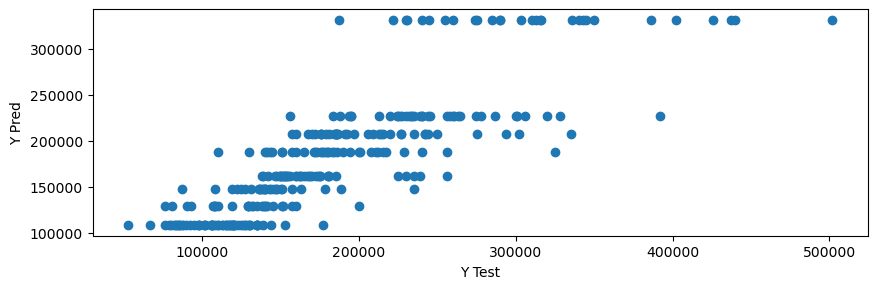

In [398]:
plt.figure(figsize=(10,3))
plt.scatter(x=y_test,y=pred_dtr)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')

## Model 2: Random Forest Regressor

In [399]:
rf_reg_params =  { 'max_depth': [5,7,10,15,18], "criterion": ["squared_error", "absolute_error", "poisson"],
                  'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [250,150,200,300,350]}
rand_rf_reg = RandomizedSearchCV(RandomForestRegressor(), rf_reg_params)

rand_rf_reg.fit(x_train, y_train)

rf_reg = rand_rf_reg.best_estimator_
# print(rf_reg)
print("Best Estimators for Random Forest Regression: ", rand_rf_reg.best_params_)
print("best r2 score: ",rand_rf_reg.best_score_)
print("------------------------------------------")

Best Estimators for Random Forest Regression:  {'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'poisson'}
best r2 score:  0.15423365989832288
------------------------------------------


In [400]:
rfr = RandomForestRegressor(criterion='poisson', 
                            max_depth= 7, 
                            max_features="sqrt",
                            n_estimators=150)
rfr.fit(x_train, y_train)
pred_rfr= rfr.predict(x_test)

In [401]:
rfrr2 = r2_score(y_test,pred_dtr)

for k in range(2,8):
    rfrscore=cross_val_score(rfr,x,y,cv=k)
    rfrcv=rfrscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",rfrcv*100)
    print("r2 score is : ",rfrr2*100)
    print("\n")

At cv=  2
Cross Val score :  17.611025661927858
r2 score is :  70.1180692720088


At cv=  3
Cross Val score :  17.416402080844414
r2 score is :  70.1180692720088


At cv=  4
Cross Val score :  15.358667871862707
r2 score is :  70.1180692720088


At cv=  5
Cross Val score :  15.084791094928034
r2 score is :  70.1180692720088


At cv=  6
Cross Val score :  15.956351635968707
r2 score is :  70.1180692720088


At cv=  7
Cross Val score :  13.335433148545428
r2 score is :  70.1180692720088




At cv=  2
- Cross Val score :  17.611025661927858
- r2 score is :  70.1180692720088

In [402]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_rfr))
print('MSE:', metrics.mean_squared_error(y_test, pred_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rfr)))

MAE: 53399.61528861743
MSE: 4787141941.671064
RMSE: 69189.17503245045


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

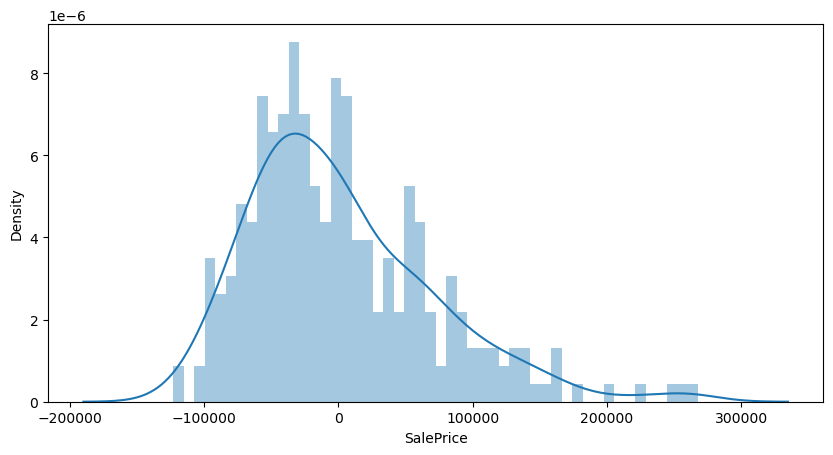

In [403]:
sns.distplot((y_test-pred_rfr),bins=50)


Text(0, 0.5, 'Y Pred')

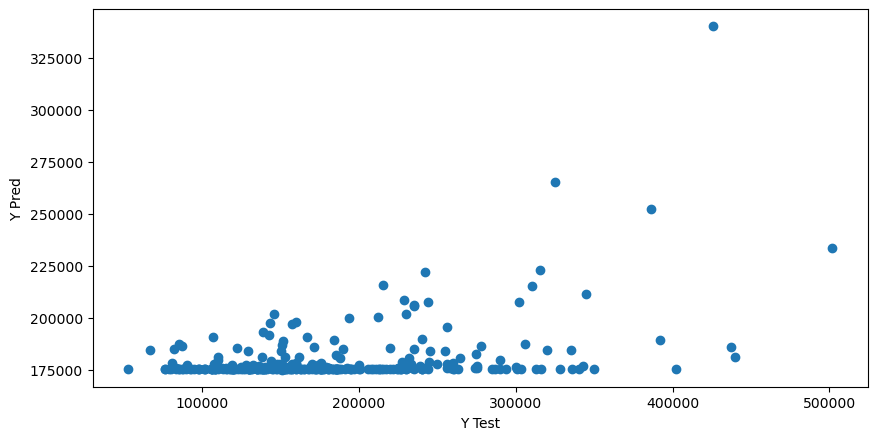

In [404]:
plt.scatter(x=y_test,y=pred_rfr)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')

## Model 3: XGB Regressor

In [405]:
from xgboost import XGBRegressor

In [406]:
xgb_reg_params =  {'booster' : ['gbtree','dart','gblinear'], 'importance_type' : ['gain','split'],'n_estimators' : [100,200,300],'eta' : [0.001, 0.01, 0.1]}
rand_xgb_reg = RandomizedSearchCV(XGBRegressor(), xgb_reg_params)

rand_xgb_reg.fit(x_train, y_train)

xgb_reg = rand_xgb_reg.best_estimator_
# print(rf_reg)
print("Best Estimators for Decision Tree Regression: ", rand_xgb_reg.best_params_)
print("best r2 score: ",rand_xgb_reg.best_score_)
print("----------------------------------------")

Best Estimators for Decision Tree Regression:  {'n_estimators': 200, 'importance_type': 'split', 'eta': 0.1, 'booster': 'dart'}
best r2 score:  0.8405359282380755
----------------------------------------


In [407]:
xgb = XGBRegressor(n_estimators= 200, 
                   importance_type= 'split', 
                   eta=0.1, booster='dart')
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
pred_xgb = xgb.predict(x_test)

In [408]:
xgbs = r2_score(y_test,pred_xgb)

for k in [2,8]:
    xgbscore=cross_val_score(xgb,x,y,cv=k)
    xgbcv=xgbscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",xgbcv*100)
    print("r2 score is : ",xgbs*100)
    print("\n")

At cv=  2
Cross Val score :  82.37209156334946
r2 score is :  86.82333863575415


At cv=  8
Cross Val score :  86.23476477602651
r2 score is :  86.82333863575415




At cv=  8
- Cross Val score :  86.23476477602651
- r2 score is :  86.82333863575415

In [409]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_xgb))
print('MSE:', metrics.mean_squared_error(y_test, pred_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_xgb)))

MAE: 18401.17053724315
MSE: 717272491.1804504
RMSE: 26781.94337945718


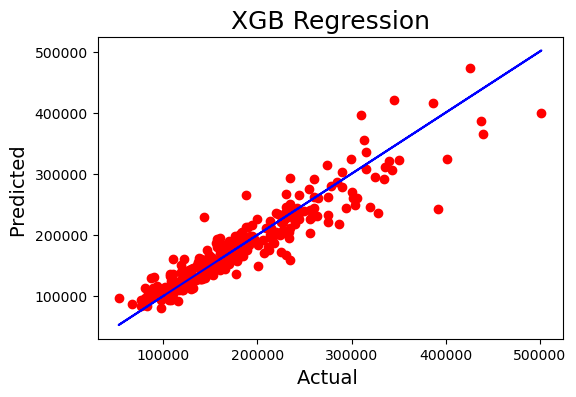

In [410]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_xgb, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title('XGB Regression',fontsize=18)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

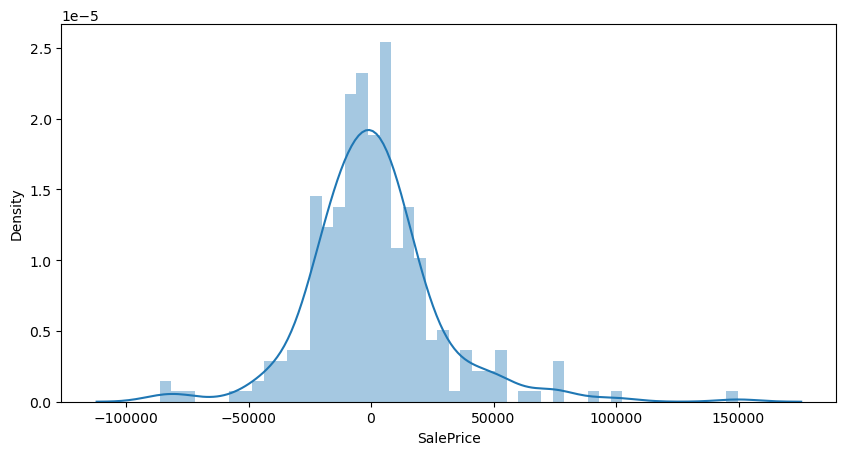

In [411]:
sns.distplot((y_test-pred_xgb),bins=50)


## Model 4: Lasso Regression

In [412]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [413]:
ls = Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

In [414]:
lss = r2_score(y_test,pred_ls)

for k in range(2,10):
    lsscore=cross_val_score(ls,x,y,cv=k)
    lrcv=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lrcv*100)
    print("r2 score is : ",lss*100)
    print("\n")

At cv=  2
Cross Val score :  76.96593528514045
r2 score is :  86.07869890407422


At cv=  3
Cross Val score :  78.04663423746977
r2 score is :  86.07869890407422


At cv=  4
Cross Val score :  78.14804362636359
r2 score is :  86.07869890407422


At cv=  5
Cross Val score :  78.04576725357242
r2 score is :  86.07869890407422


At cv=  6
Cross Val score :  78.67680685385511
r2 score is :  86.07869890407422


At cv=  7
Cross Val score :  77.5751999328536
r2 score is :  86.07869890407422


At cv=  8
Cross Val score :  78.8602883531012
r2 score is :  86.07869890407422


At cv=  9
Cross Val score :  77.51264847558062
r2 score is :  86.07869890407422




At cv=  8
- Cross Val score :  78.8602883531012
- r2 score is :  86.07869890407422

In [415]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_ls))
print('MSE:', metrics.mean_squared_error(y_test, pred_ls))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ls)))

MAE: 20465.160043436088
MSE: 757807007.5203252
RMSE: 27528.29467148892


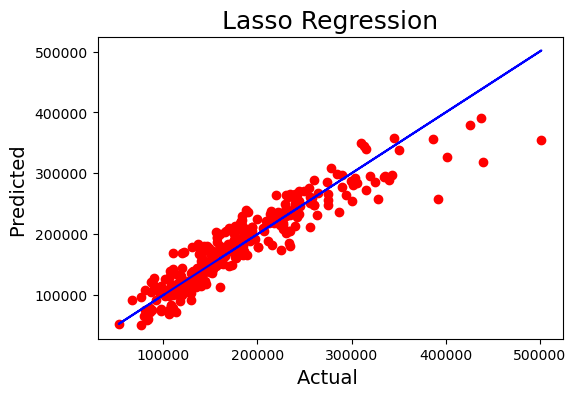

In [416]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_ls, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

### Saving the model:

In [417]:
filename='House_pred_model.pickle'
pickle.dump(xgb,open(filename,'wb'))

## Now Predictions:

In [418]:
df_test=pd.read_csv("housetest.csv")

In [419]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [420]:
df_test.shape

(292, 80)

In [421]:
(df_test.isnull().sum()[df_test.isnull().sum()>0])/len(df_test)*100

LotFrontage      15.410959
Alley            95.205479
MasVnrType        0.342466
MasVnrArea        0.342466
BsmtQual          2.397260
BsmtCond          2.397260
BsmtExposure      2.397260
BsmtFinType1      2.397260
BsmtFinType2      2.397260
Electrical        0.342466
FireplaceQu      47.602740
GarageType        5.821918
GarageYrBlt       5.821918
GarageFinish      5.821918
GarageQual        5.821918
GarageCond        5.821918
PoolQC          100.000000
Fence            84.931507
MiscFeature      96.575342
dtype: float64

In [423]:
# Replace Null values with 'None'  
for col in ('MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    
    df_test[col]=df_test[col].fillna('None')

In [424]:
#Dropping the columns which have 85%+ values related to only one unique value.
cols=[]
for col in df_test.select_dtypes("object").columns:
    if df_test[col].value_counts().max()>= int(round(0.85*len(df_test),0)):
        cols.append(col)
cols

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [425]:
df_test.drop(['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType'],inplace=True,axis=1)

In [429]:
df_test['LotFrontage'] = df_test['LotFrontage'].replace(np.nan, round(df_test['LotFrontage'].mean(),0))
df_test['MasVnrArea'] = df_test['MasVnrArea'].replace(np.nan,  round(df_test['MasVnrArea'].mean(),0))
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].replace(np.nan, round(df_test['GarageYrBlt'].mean(),0))

In [426]:
df_test.drop(['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal'],inplace=True,axis=1)

In [427]:
df_train[df_train.duplicated(keep=False)]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LotConfig, Neighborhood, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, Foundation, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, MoSold, YrSold, SaleCondition, SalePrice]
Index: []

In [430]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
MoSold           0
YrSold           0
SaleCondition    0
dtype: int64

In [433]:
df_test.drop(['Id', 'TotRmsAbvGrd' ,'2ndFlrSF',"GarageArea","1stFlrSF","GarageYrBlt"],axis=1,inplace=True)

In [434]:
for col in df_test.select_dtypes("object").columns:
    df_test[col] = le.fit_transform(df_test[col])    

In [436]:
df_test.drop(["Exterior2nd"],axis=1,inplace=True)

In [437]:
x_new2=power_transform(df_test)
df_sk2=pd.DataFrame(x_new2,columns=df_test.columns)
df_sk2.skew()

MSSubClass       0.089921
MSZoning         0.133712
LotFrontage      0.096411
LotArea          0.003111
LotShape        -0.623034
LotConfig       -1.045888
Neighborhood    -0.157737
BldgType         1.662617
HouseStyle      -0.067515
OverallQual     -0.002016
OverallCond     -0.079098
YearBuilt       -0.171084
YearRemodAdd    -0.227509
RoofStyle       -0.472902
Exterior1st     -0.281575
MasVnrType      -0.025474
MasVnrArea       0.363254
ExterQual       -0.700849
Foundation       0.058252
BsmtQual        -0.287537
BsmtExposure    -0.682993
BsmtFinType1    -0.146866
BsmtFinSF1      -0.441605
BsmtUnfSF       -0.232099
TotalBsmtSF     -0.037982
HeatingQC        0.217769
GrLivArea       -0.000307
BsmtFullBath     0.341330
FullBath        -0.064123
HalfBath         0.621093
BedroomAbvGr     0.143193
KitchenQual     -0.505401
Fireplaces       0.076669
FireplaceQu      0.036081
GarageType       0.286162
GarageFinish    -0.439600
GarageCars      -0.030495
WoodDeckSF       0.210102
OpenPorchSF 

In [440]:
x_scaler2=scaler.fit_transform(df_sk2)

In [445]:
Y=testpca.fit(x_scaler2)
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
k=np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: ",k)

Number of components explaining 95% variance:  30


In [448]:
FinalPCA2=PCA(n_components=32)
FinalData4=FinalPCA2.fit_transform(x_scaler)
FinalData3=pd.DataFrame(FinalData4)
x=FinalData3

In [449]:
y_pred2=xgb.predict(x)

## Storing Output

In [450]:
output=pd.DataFrame(y_pred2)
output

0
0     128091.101562
1     268085.687500
2     268229.062500
3     189849.203125
4     214014.890625
...             ...
1163  121563.343750
1164  117983.375000
1165  148300.187500
1166   40370.535156
1167  200829.390625

[1168 rows x 1 columns]

In [451]:
output.to_excel("output_test_data.xlsx", index = False)

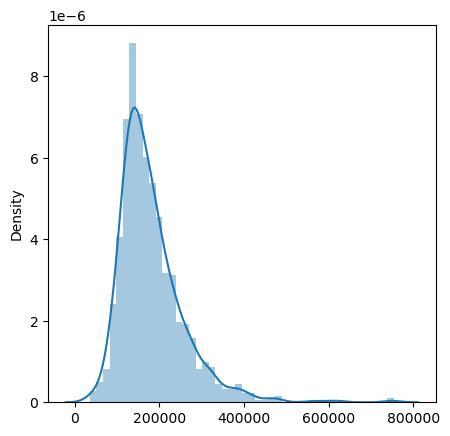

In [452]:
plt.figure(figsize = (5,5))
sns.distplot(y_pred2)
plt.show()